In [1]:
%reset -f

In [1]:
#import pandas_datareader as pd_data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns
import math as m
import scipy as sp
from statsmodels.stats.anova import anova_lm
import pandas_datareader as pd_data

C:\Users\usuario\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
# Importing the Time Series Analysis module for simulating data
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMAResults
from statsmodels.tsa.stattools import arma_order_select_ic
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.tsa.stattools as sm_tools

In [4]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import pmdarima as pm 
from datetime import datetime
# For splines
import patsy
from patsy import dmatrix
from arch import arch_model
from arch.univariate import ARX
from arch.univariate import GARCH
import pandas_datareader.data as web
import datetime as dt
import scipy.stats as st

In [5]:
# Will fix figure size for this notebook
plt.rcParams["figure.figsize"] = (8,6)

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_pickle('AllFinancialDataExam2019.pkl')
expert=pd.read_pickle('EXPERTALL30.pkl')
FTSE=df['FTSE']

In [7]:
df.head()

,GBPUSD,EURGBP,AAPL,SPY,SPYVol,SPYOpen,GOLD,FTSE,UKG,UST,AV,BH,BD
date,,,,,,,,,,,,,
2012-08-15,1.5679,0.7834,78.748901,140.95,71012147.0,140.64,155.63,5833.0000,2034.5,1.805,323.4,1284.564209,146.6
2012-08-16,1.5734,0.7851,79.436752,141.99,111977601.0,141.15,156.56,5834.5000,2027.0,1.836,326.7,1303.476440,145.9
2012-08-17,1.5697,0.7848,80.906044,142.18,90784837.0,142.23,156.72,5852.3999,2035.5,1.816,328.7,1300.489136,149.0
2012-08-20,1.5708,0.7856,83.033203,142.19,78199468.0,141.98,157.26,5824.3999,2033.5,1.814,325.0,1293.852905,152.2
2012-08-21,1.5782,0.7899,81.898483,141.76,105399601.0,142.54,158.83,5857.5000,2020.5,1.805,334.1,1313.426514,153.4


In [8]:
df.tail()

,GBPUSD,EURGBP,AAPL,SPY,SPYVol,SPYOpen,GOLD,FTSE,UKG,UST,AV,BH,BD
date,,,,,,,,,,,,,
2018-12-21,1.2630,0.9000,148.498795,240.70,255345633.0,246.74,118.72,6721.2002,2264.5000,2.792,371.9,1585.141602,452.0
2018-12-24,1.2701,0.8982,144.656540,234.34,147311588.0,239.04,120.02,6686.0000,2282.3799,2.749,372.2,1573.036865,444.7
2018-12-27,1.2642,0.9037,153.838562,248.07,186267342.0,242.57,120.57,6584.7002,2262.2500,2.743,364.6,1548.058960,446.0
2018-12-28,1.2698,0.9012,153.917389,247.75,153100189.0,249.58,121.06,6734.0000,2272.3799,2.736,376.6,1572.652710,459.1
2018-12-31,1.2750,0.8992,155.405045,249.92,144299370.0,249.56,121.25,6728.1001,2268.3799,2.686,375.5,1586.678711,462.8


In [9]:
expert_align=expert.shift(30)
print(expert.head())
print(expert.tail())
print(expert_align.head())
print(expert_align.tail())
print(FTSE.head())
print(FTSE.tail())

date
2012-07-03    5855.101271
2012-07-05    5686.129754
2012-07-06    5902.311989
2012-07-09    5916.024803
2012-07-10    5940.475237
dtype: float64
date
2019-02-06    7178.350810
2019-02-07    7045.097690
2019-02-08    7077.599834
2019-02-11    7098.891179
2019-02-12    7147.095940
dtype: float64
date
2012-07-03   NaN
2012-07-05   NaN
2012-07-06   NaN
2012-07-09   NaN
2012-07-10   NaN
dtype: float64
date
2019-02-06    7102.450164
2019-02-07    7071.055180
2019-02-08    7125.765860
2019-02-11    7143.931059
2019-02-12    7205.362083
dtype: float64
date
2012-08-15    5833.0000
2012-08-16    5834.5000
2012-08-17    5852.3999
2012-08-20    5824.3999
2012-08-21    5857.5000
Name: FTSE, dtype: float64
date
2018-12-21    6721.2002
2018-12-24    6686.0000
2018-12-27    6584.7002
2018-12-28    6734.0000
2018-12-31    6728.1001
Name: FTSE, dtype: float64


In [ ]:
#getprediction SARIMAX L9-10?
#pm.autoa_arima seasonal=True

#removing outliers
# Do something about outlier (it makes sense in this case)
#loc = logprice.idxmax()
#logprice['RRP'][loc]=percent_replace

In [10]:
def plot_diagnostics(data, ljb=0, plt_PACF = False, plt_dataSqrACF=False, lags=40):
    if(ljb==0):
        m = int(np.log(len(data)))
        ljbtest = sm.stats.acorr_ljungbox(data,m)
    else:
        ljbtest = sm.stats.acorr_ljungbox(data,ljb)
            
    plt.hist(data, bins =40,color='m', density = True)
    mu = data.mean()
    sigma = data.std()
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 2419)
    plt.plot(x, stats.norm.pdf(x, mu, sigma), linewidth= 5)
    plt.grid()
    plt.show()
    plt.plot(data)
    plt.grid()
    plt.show()
    plot_acf(data,lags=lags,zero=False)
    plt.grid()
    plt.show()
    if(plt_PACF):
        plot_pacf(data,lags=lags,zero=False)
        plt.title('PACF Data')
        plt.grid()
        plt.show()
    if(plt_dataSqrACF):
        plot_acf(data**2,lags=lags,zero=False)
        plt.title('ACF Data SQr')
        plt.grid()
        plt.show()
        plot_pacf(data**2,lags=lags,zero=False)#Also plot PACF if ACF is recquired
        plt.title('PACF Data SQr')
        plt.grid()
        plt.show()
    plt.plot(ljbtest[1])
    plt.axhline(y=0.05, color='r',ls='--')
    plt.grid()
    plt.show()
    plt.figure(1, figsize=(15,12))
    fig = sm.qqplot(data, line='q')
    plt.title('Normal QQ plot', fontsize=15)
    plt.grid()
    plt.show()
    #Statistics:
    JB_test = stats.jarque_bera(data)
    print('Jarque-Bera statitiscs: ', JB_test[0])
    print('Jarque-Bera p-value: ', JB_test[1])
    shap_test = stats.shapiro(data)
    print('Shapiro statitiscs: ', shap_test[0])
    print('Shapiro p-value: ', shap_test[1])
    kurt=stats.kurtosis(data, fisher=False)
    sk=stats.skew(data)
    print('Skewness:', sk)
    print('Kurtosis:', kurt)

In [200]:
#Improve simple code below to improve display
def plot_diagnosticsTight2(data, title1 = 'Residuals Diff Differenced Data', lags=40):

    fig, axes = plt.subplots(1,2,figsize=(15,5))
    axes[0].set_ylabel('ACF', fontsize=10)
    axes[0].set_xlabel('Lag', fontsize=10)
    fig = plot_acf(data,lags=lags,zero=False, ax = axes[0], title= 'ACF '+ title1, use_vlines = True)
    axes[1].set_ylabel('PACF', fontsize=10)
    axes[1].set_xlabel('Lag', fontsize=10)
    fig = plot_pacf(data,lags=lags,zero=False, ax = axes[1], title= 'PACF '+ title1, use_vlines = True)
    plt.tight_layout()
    plt.savefig("ACF2.png", dpi = 300)
   

In [12]:
#FIRST PLOT SUMMARY. TREND? MAYBE SEASONAL? IMPORT WEEKLY, YEARLY...
#WE CAN TRY RETURNS INSTEAD OF LOG-RETURNS
#ADF AND KPSS. ACF AND PACF

#Even though there is no auto-correlation and residuals pass the Ljung-Box test, there seem to be clusters in the data and also the QQ plot does not fit with normality. There could be due to heteroskedasticity - so we examine the squared residulas

#5) Check squared residuals ACF/PACF - these indicate some AR with order maybe 5 - 9, depending on how complex we wish model to be.

In [13]:
# Define a very simple function to searhch for models - will have to be flexible, given that
# Python arch_model does not take as mean the ARMA model, but only ARX model...
# When possible, will choose simpler models.

def searchARMA(data, exog, max_p, max_q):
 
    aic = np.zeros((max_p,max_q))
    for i in range(max_p):
        for j in range(max_q):
            try:
                if(len(exog) == len(data)):
                    model = ARMA(data,(i,j), exog = exog) 
                else:
                     model = ARMA(data,(i,j)) 
                res = model.fit(trend='nc')
                aic[i,j] = res.aic
                print('p:',i,' q:', j,' aic:', aic[i,j])
            except:
                continue

In [4]:
#autoatima?
#Polynomial division for ARMA to AR. Check MA polynomial roots?

In [1]:
#Just repeating results in SARIMAX to get functions from this class
#does it admit regressors?
#model = sm.tsa.SARIMAX(AAPLRet, order=(4, 0, 0), trend='c')
#fit = model.fit()
#print(fit.summary());
#results.cov_params() colinearity?

In [ ]:
#Quickly create cateogry to extract day of the week.

N = len(price)
y_pos = np.zeros(N)
for i in range(N):
    temp = pd.Timestamp(AEMO.index[i])
    y_pos[i]= temp.weekday()

AEMO['DayWeek'] = y_pos
AEMO['DayWeek'].astype('category');
AEMO.tail(10)
#AEMO.boxplot(by='DayWeek',rot=45, fontsize=10,figsize=(12,8))
#seasonal_decompose? L9-10: 14 is wrong¡
#year = oneYearTemp.iloc[0][1]


In [6]:
#Even though there is no auto-correlation and residuals pass the Ljung-Box test, 
#there seem to be clusters in the data and also the QQ plot does not fit with normality. 
#There could be due to heteroskedasticity - so we examine the squared residulas
plot_diagnosticsTight2(fit.resid**2, title1='Squared Residuals')

NameError: name 'plot_diagnosticsTight2' is not defined

In [3]:
# The model allows us to choose specific lags - this is very similar to the SARIMAX function from statsmodels:
# Diff are possibly due to numerical approx / methods/ tolerance

newAAPLRet =AAPLRet
arx = ARX(newAAPLRet, lags=4,rescale = False) #this is eq. to AR(4) as per above
arx.volatility = GARCH(5,0,0)
res = arx.fit(update_freq=0)#, tol=0.000001
print(res.summary())

NameError: name 'AAPLRet' is not defined

In [ ]:
from arch.univariate import StudentsT

ar.distribution = StudentsT()
res = ar.fit(update_freq=0, disp='off')
print(res.summary())

In [9]:
res.plot()
#Preferred approach: try to scale the returns (by x 100)...
#The QQ plot still does not seem to fit a normal, potentially a different distribution shoudl be considered.

NameError: name 'res' is not defined

In [2]:
#forecasting from 156 on

In [204]:
# Now create a dataframe with your datetime data and your meanTemp values
# Remember to set the index to the datetime column
# display

for i in range(N):
    month = oneYearTemp.iloc[i][2]
    day = oneYearTemp.iloc[i][3]
    dt.append(datetime(year=int(year), month = int(month), day= int(day))) #IMPORTANT. HOW TO CREATE DATETIME¡
    
myList = [dt, meanTemp.values]
myNames = ['date','meanTemp']
myDict = dict(zip(myNames, myList))
dfMeanTemp = pd.DataFrame({ key:pd.Series(value) for key, value in myDict.items()})
dfMeanTemp.set_index(dfMeanTemp['date'], inplace = True) #if it is not true id does not work but I do not know why
del dfMeanTemp['date']

NameError: name 'N' is not defined

# Ejercicio 1

In [14]:
df.head()

,GBPUSD,EURGBP,AAPL,SPY,SPYVol,SPYOpen,GOLD,FTSE,UKG,UST,AV,BH,BD
date,,,,,,,,,,,,,
2012-08-15,1.5679,0.7834,78.748901,140.95,71012147.0,140.64,155.63,5833.0000,2034.5,1.805,323.4,1284.564209,146.6
2012-08-16,1.5734,0.7851,79.436752,141.99,111977601.0,141.15,156.56,5834.5000,2027.0,1.836,326.7,1303.476440,145.9
2012-08-17,1.5697,0.7848,80.906044,142.18,90784837.0,142.23,156.72,5852.3999,2035.5,1.816,328.7,1300.489136,149.0
2012-08-20,1.5708,0.7856,83.033203,142.19,78199468.0,141.98,157.26,5824.3999,2033.5,1.814,325.0,1293.852905,152.2
2012-08-21,1.5782,0.7899,81.898483,141.76,105399601.0,142.54,158.83,5857.5000,2020.5,1.805,334.1,1313.426514,153.4


In [15]:
SPYrtn=df['SPYOpen']-df['SPY']
SPYVol=df['SPYVol']

In [16]:
#plt.figure(1, figsize=(15,12))

# use LaTeX fonts in the plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

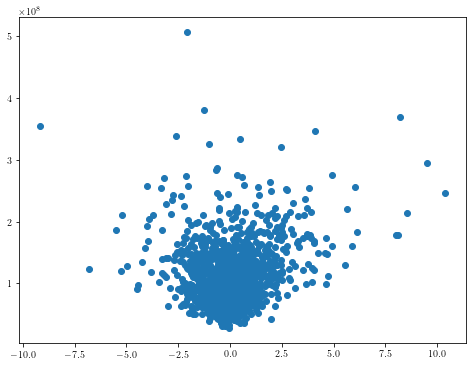

In [25]:
plt.scatter(SPYrtn,SPYVol)
plt.show()

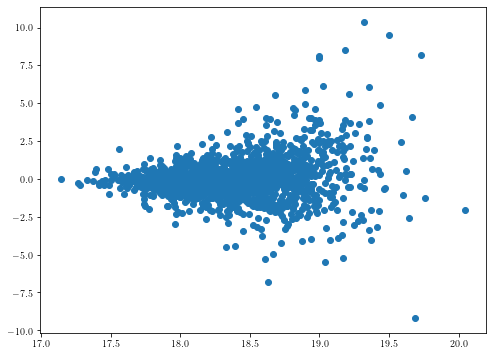

In [26]:
plt.scatter(np.log(SPYVol),SPYrtn)
plt.show()

In [30]:
from scipy.stats.stats import pearsonr
p=pearsonr(SPYrtn,SPYVol)
plog=pearsonr(SPYrtn,np.log(SPYVol))
print(p)
print(plog)

(0.16252399073221357, 8.578308147485852e-11)
(0.1519470269225308, 1.339617200437965e-09)


In [29]:
p

(0.16252399073221357, 8.578308147485852e-11)

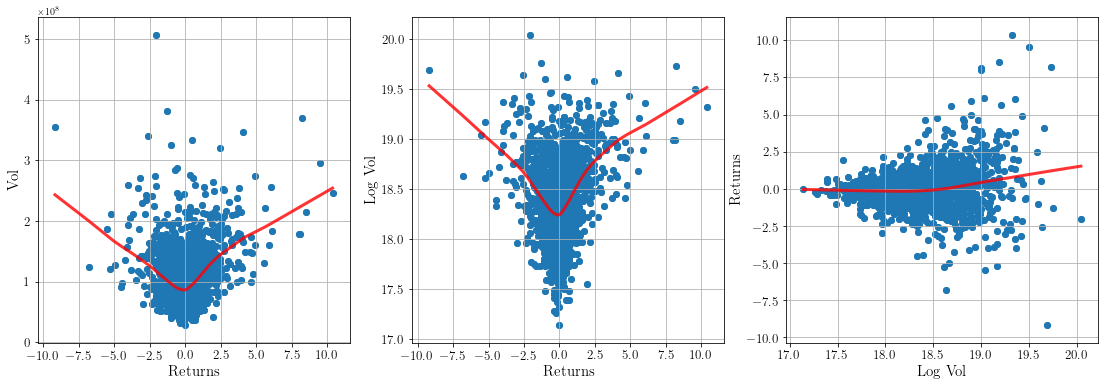

In [20]:
plt.figure(1, figsize=(19,6))

plt.subplot(1,3,1)
plt.scatter(SPYrtn,SPYVol)
plt_result = sns.regplot(SPYrtn,SPYVol, lowess=True,line_kws={'color': 'red', 'lw': 3, 'alpha': 0.8}) #alpha:transparence,'lw':thickness
plt.xlabel("Returns", fontsize=15)
plt.ylabel("Vol", fontsize=15);
plt.xticks(fontsize = 13) 
plt.yticks(fontsize = 13)
plt.grid()

plt.subplot(1,3,2)
x=SPYrtn
y=np.log(SPYVol)
plt.scatter(x,y)
plt_result = sns.regplot(x, y, lowess=True,line_kws={'color': 'red', 'lw': 3, 'alpha': 0.8}) #alpha:transparence,'lw':thickness
plt.xlabel("Returns", fontsize=15)
plt.ylabel("Log Vol", fontsize=15);
plt.xticks(fontsize = 13) 
plt.yticks(fontsize = 13)
plt.grid()


plt.subplot(1,3,3)
y=SPYrtn
x=np.log(SPYVol)
plt.scatter(x,y)
plt_result = sns.regplot(x, y, lowess=True,line_kws={'color': 'red', 'lw': 3, 'alpha': 0.8}) #alpha:transparence,'lw':thickness
plt.ylabel("Returns", fontsize=15)
plt.xlabel("Log Vol", fontsize=15);
plt.xticks(fontsize = 13) 
plt.yticks(fontsize = 13)
plt.grid()


plt.savefig("question1_2.jpg", bbox_inches='tight')
plt.show()

In [21]:
import patsy
from patsy import dmatrix

In [22]:
# Data
x=SPYrtn
y=np.log(SPYVol)

# Use Natural Spline Regression
data = {"x": x} #type:dict
x_ns_5 = dmatrix("cr(x, df=5)-1", data)
x_ns_5 = np.asarray(x_ns_5)
x_ns_5 = sm.add_constant(x_ns_5)
lm_5 = sm.OLS(y, x_ns_5).fit()

x_ns_10 = dmatrix("cr(x, df=10)-1", data)
x_ns_10 = np.asarray(x_ns_10)
x_ns_10 = sm.add_constant(x_ns_10)
lm_10 = sm.OLS(y, x_ns_10).fit()

x_ns_20 = dmatrix("cr(x, df=20)-1", data)
x_ns_20 = np.asarray(x_ns_20)
x_ns_20 = sm.add_constant(x_ns_20)
lm_20 = sm.OLS(y, x_ns_20).fit()

In [23]:
from statsmodels.stats.anova import anova_lm

table1 = anova_lm(lm_5,lm_10)
table2 = anova_lm(lm_5,lm_20)
table3 = anova_lm(lm_10,lm_20)
print(table1)
print(table2)
print(table3)
aic_values = [lm_5.aic, lm_10.aic,lm_20.aic]
bic_values = [lm_5.bic, lm_10.bic,lm_20.bic]
models = ['5 knots','10 knots','20 knots']
model_selection = pd.DataFrame(np.array([models,aic_values,bic_values]).T, columns = ['model','aic','bic'])
model_selection

   df_resid         ssr  df_diff   ss_diff        F    Pr(>F)
0    1571.0  213.400896      0.0       NaN      NaN       NaN
1    1566.0  211.900952      5.0  1.499943  2.21699  0.050272
   df_resid         ssr  df_diff   ss_diff         F    Pr(>F)
0    1571.0  213.400896      0.0       NaN       NaN       NaN
1    1556.0  210.279724     15.0  3.121171  1.539709  0.083685
   df_resid         ssr  df_diff   ss_diff         F    Pr(>F)
0    1566.0  211.900952      0.0       NaN       NaN       NaN
1    1556.0  210.279724     10.0  1.621228  1.199655  0.286315


,model,aic,bic
0,5 knots,1331.3252275458508,1358.1384538979398
1,10 knots,1330.2087907752793,1383.8352434794576
2,20 knots,1338.1046465168833,1445.35755192524


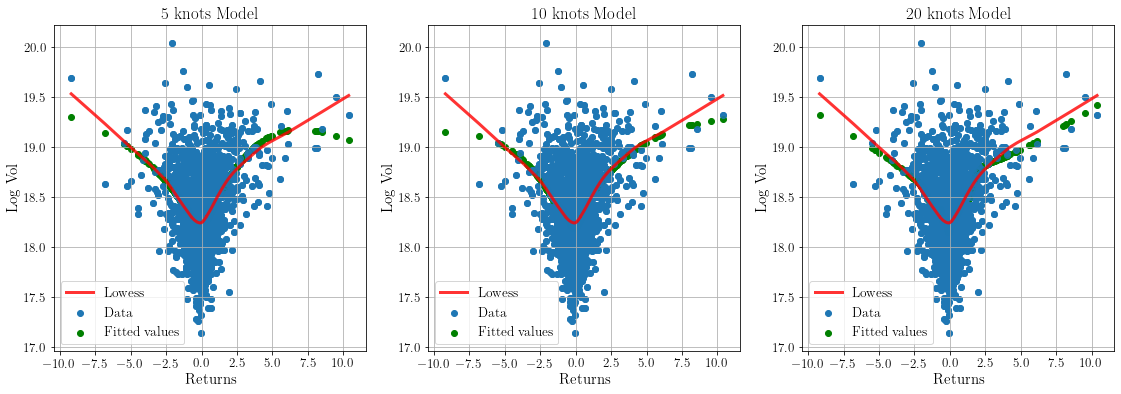

In [179]:
plt.figure(1, figsize=(19,6))

x=SPYrtn
y=np.log(SPYVol)

plt.subplot(1,3,1)
plt.scatter(x,y)
plt.scatter(x,lm_5.fittedvalues, color = 'green')
plt_result = sns.regplot(x, y, lowess=True,line_kws={'color': 'red', 'lw': 3, 'alpha': 0.8}) #alpha:transparence,'lw':thickness
plt.xlabel("Returns", fontsize=15)
plt.ylabel("Log Vol", fontsize=15);
plt.xticks(fontsize = 13) 
plt.yticks(fontsize = 13)
plt.grid()
plt.legend(('Lowess','Data','Fitted values'),fontsize=13.5)
plt.title('5 knots Model',fontsize=17)

plt.subplot(1,3,2)
plt.scatter(x,y)
plt.scatter(x,lm_10.fittedvalues, color = 'green')
plt_result = sns.regplot(x, y, lowess=True,line_kws={'color': 'red', 'lw': 3, 'alpha': 0.8}) #alpha:transparence,'lw':thickness
plt.xlabel("Returns", fontsize=15)
plt.ylabel("Log Vol", fontsize=15);
plt.xticks(fontsize = 13) 
plt.yticks(fontsize = 13)
plt.grid()
plt.legend(('Lowess','Data','Fitted values'),fontsize=13.5)
plt.title('10 knots Model',fontsize=17)

plt.subplot(1,3,3)
plt.scatter(x,y)
plt.scatter(x,lm_20.fittedvalues, color = 'green')
plt_result = sns.regplot(x, y, lowess=True,line_kws={'color': 'red', 'lw': 3, 'alpha': 0.8}) #alpha:transparence,'lw':thickness
plt.xlabel("Returns", fontsize=15)
plt.ylabel("Log Vol", fontsize=15);
plt.xticks(fontsize = 13) 
plt.yticks(fontsize = 13)
plt.grid()
plt.legend(('Lowess','Data','Fitted values'),fontsize=13.5)
plt.title('20 knots Model',fontsize=17)

plt.savefig("question1_3.jpg", bbox_inches='tight')
plt.show()

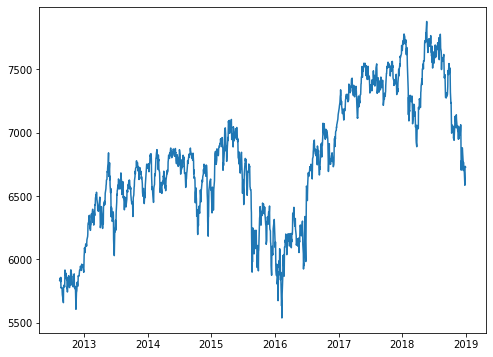

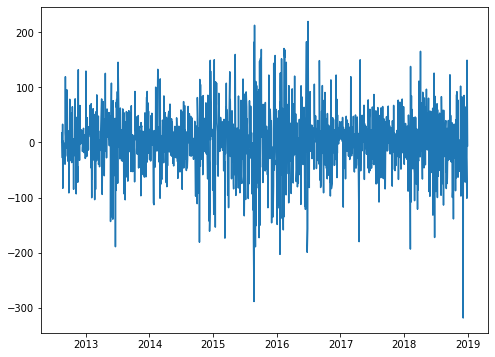

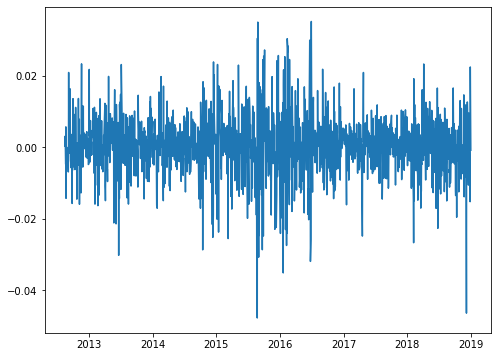

In [10]:
plt.plot(FTSE)
FTSERet = np.log(FTSE).diff().dropna()
FTSERet2 = FTSE.diff().dropna()
plt.show()
plt.plot(FTSERet2)
plt.show()
plt.plot(FTSERet)
plt.show()

In [58]:
#CHECK STATIONARITY. ADF AND KPSS
test = adfuller(FTSERet2)
print('ADF Statistic: %f' % test[0])
print('p-value: %f' % test[1])
print('Critical Values:i/')
for item, value in test[4].items():
    print('\t%s: %.2f' % (item, value))
    
test = kpss(FTSERet2) 
print('KPSS Statistic: %f' % test[0])
print('p-value: %f' % test[1])
print('Critical Values:')
for item, value in test[3].items():
    print('\t%s: %.2f' % (item, value))

ADF Statistic: -21.238405
p-value: 0.000000
Critical Values:i/
	1%: -3.43
	5%: -2.86
	10%: -2.57
KPSS Statistic: 0.101430
p-value: 0.100000
Critical Values:
	10%: 0.35
	5%: 0.46
	2.5%: 0.57
	1%: 0.74


In [85]:
print(FTSERet2[0:3])
FTSERet2[246:252]
#247 dias

date
2012-08-16     1.5000
2012-08-17    17.8999
2012-08-20   -28.0000
Name: FTSE, dtype: float64


date
2013-08-16    16.7002
2013-08-19   -34.2998
2013-08-20   -12.2002
2013-08-21   -62.7002
2013-08-22    56.1001
2013-08-23    45.2002
Name: FTSE, dtype: float64

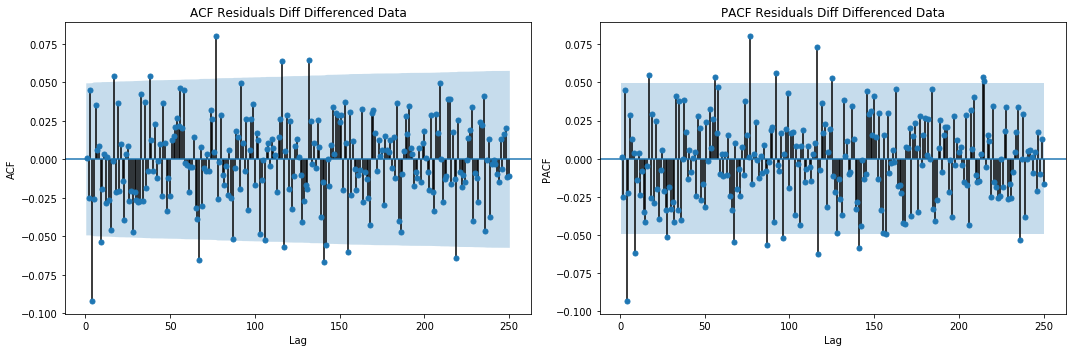

In [87]:
plot_diagnosticsTight2(FTSERet2, title1 = 'Residuals Diff Differenced Data',lags=250) #look at log returns?

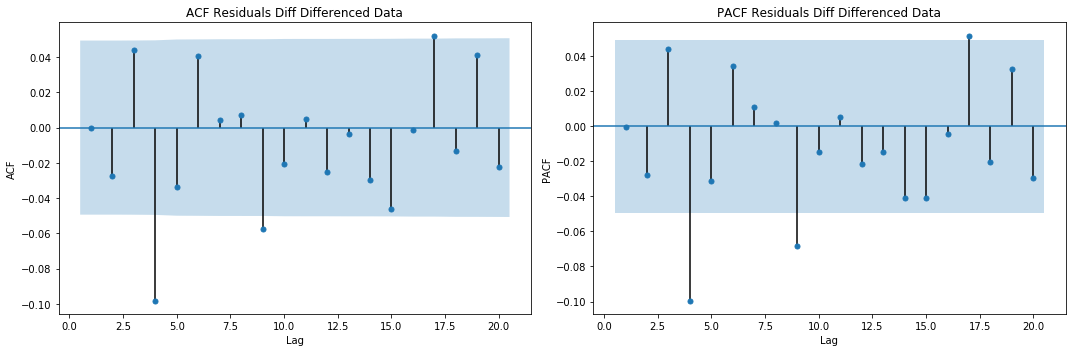

In [94]:
plot_diagnosticsTight2(FTSERet, title1 = 'Residuals Diff Differenced Data',lags=20) #look at log returns?; significance 10%?

In [93]:
exog = np.arange(1)
searchARMA(FTSERet, exog, max_p=6, max_q = 6)

p: 0  q: 1  aic: -10534.066271639835
p: 0  q: 2  aic: -10533.557824191712
p: 0  q: 3  aic: -10534.267382172433
p: 0  q: 4  aic: -10547.03796041736
p: 0  q: 5  aic: -10548.542998537607
p: 1  q: 0  aic: -10534.066270744755
p: 1  q: 4  aic: -10546.826582018426
p: 1  q: 5  aic: -10549.127579897795
p: 2  q: 0  aic: -10533.256809322938
p: 2  q: 1  aic: -10536.268455544121
p: 2  q: 5  aic: -10549.647139096747
p: 3  q: 0  aic: -10534.34871759364
p: 3  q: 1  aic: -10537.238515713194
p: 3  q: 2  aic: -10541.306581034745
p: 4  q: 0  aic: -10547.9925364462
p: 4  q: 1  aic: -10546.844071699565
p: 4  q: 2  aic: -10550.176112001047
p: 4  q: 3  aic: -10550.149377927051
p: 5  q: 0  aic: -10547.482856891738
p: 5  q: 1  aic: -10547.028692816206
p: 5  q: 2  aic: -10549.889779223839
p: 5  q: 3  aic: -10548.247071595346
p: 5  q: 4  aic: -10548.451154813869


In [118]:
model2 = sm.tsa.SARIMAX(FTSERet2, order=(4, 0, 0), trend='c')
fit2 = model.fit()
res2=fit2.resid
print(fit.summary());

                           Statespace Model Results                           
Dep. Variable:                   FTSE   No. Observations:                 1575
Model:               SARIMAX(4, 0, 0)   Log Likelihood                5279.100
Date:                Wed, 11 Dec 2019   AIC                         -10546.199
Time:                        13:02:39   BIC                         -10514.027
Sample:                             0   HQIC                        -10534.243
                               - 1575                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   9.409e-05      0.000      0.413      0.680      -0.000       0.001
ar.L1          0.0058      0.017      0.337      0.736      -0.028       0.039
ar.L2         -0.0306      0.018     -1.725      0.0

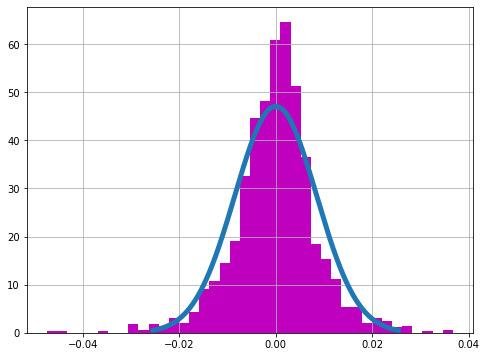

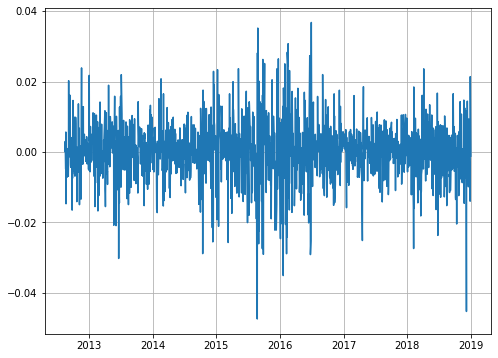

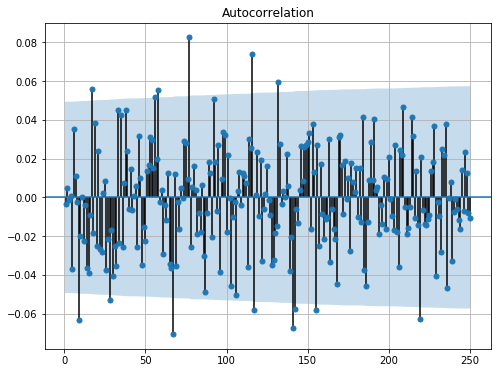

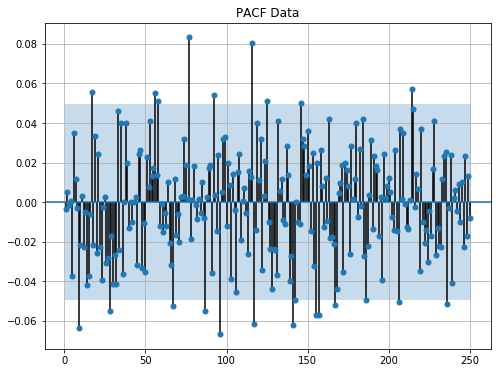

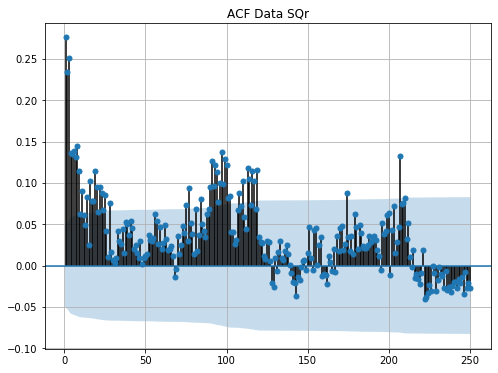

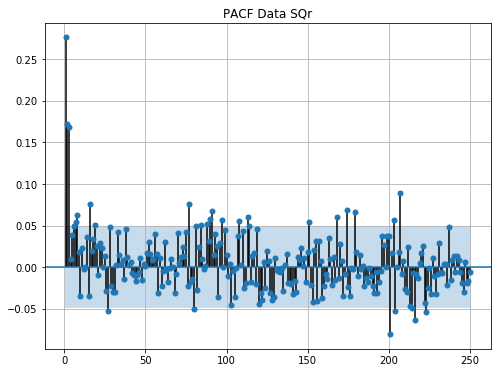

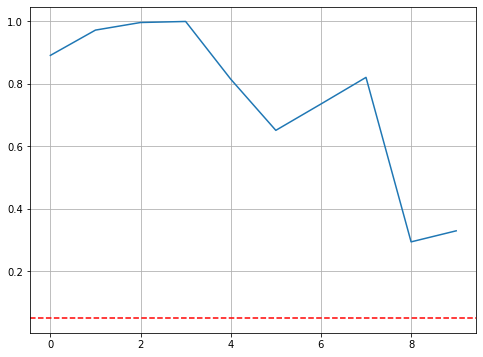

<Figure size 1080x864 with 0 Axes>

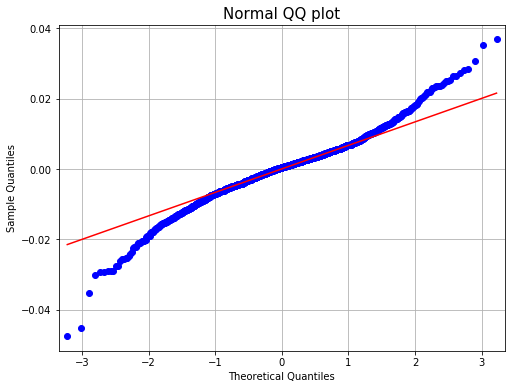

Jarque-Bera statitiscs:  460.4119068817393
Jarque-Bera p-value:  0.0
Shapiro statitiscs:  0.9685823321342468
Shapiro p-value:  5.0352502206797424e-18


In [120]:
plot_diagnostics(res2, plt_PACF = True, plt_dataSqrACF=True, ljb=10, lags=250)

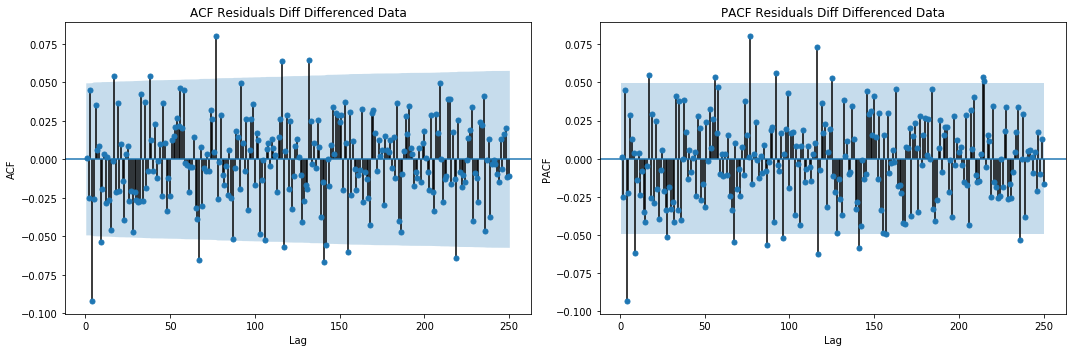

In [121]:
plot_diagnosticsTight2(FTSERet2, title1 = 'Residuals Diff Differenced Data',lags=250) #look at log returns?

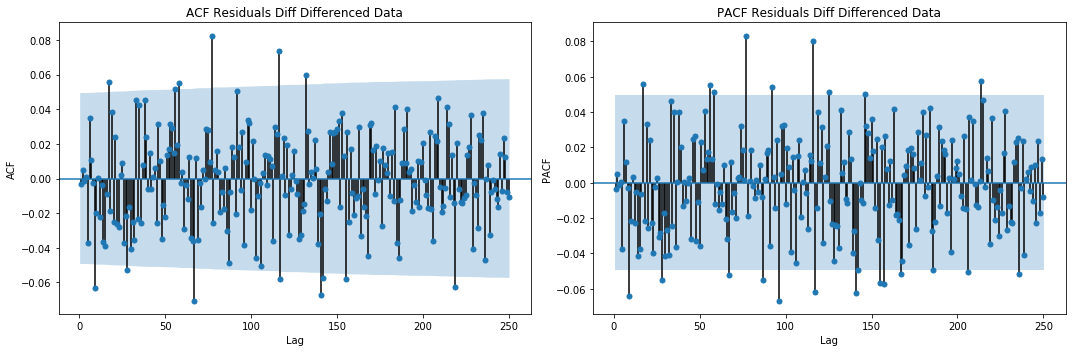

In [122]:
plot_diagnosticsTight2(res2, title1 = 'Residuals Diff Differenced Data',lags=250) #I did not solve it¡ maybe GARCH does it...

In [114]:
model = sm.tsa.SARIMAX(FTSERet, order=(4, 0, 0), trend='c')
fit = model.fit()
res=fit.resid
print(fit.summary());

                           Statespace Model Results                           
Dep. Variable:                   FTSE   No. Observations:                 1575
Model:               SARIMAX(4, 0, 0)   Log Likelihood                5279.100
Date:                Wed, 11 Dec 2019   AIC                         -10546.199
Time:                        12:58:23   BIC                         -10514.027
Sample:                             0   HQIC                        -10534.243
                               - 1575                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   9.409e-05      0.000      0.413      0.680      -0.000       0.001
ar.L1          0.0058      0.017      0.337      0.736      -0.028       0.039
ar.L2         -0.0306      0.018     -1.725      0.0

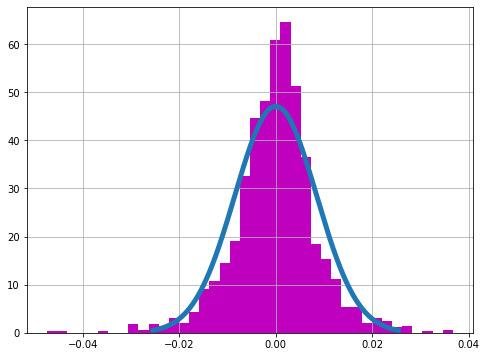

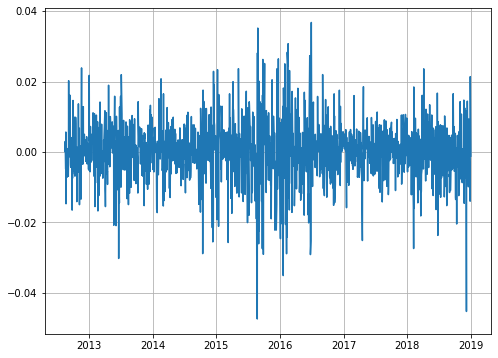

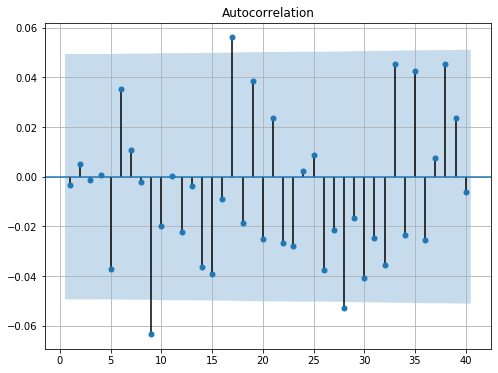

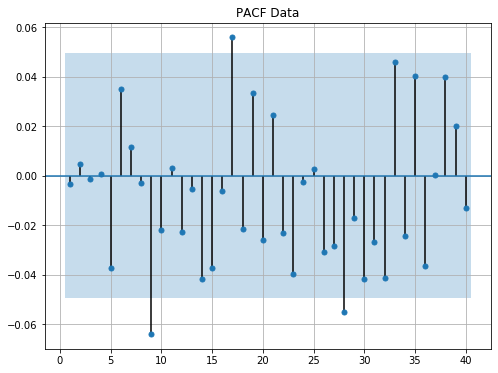

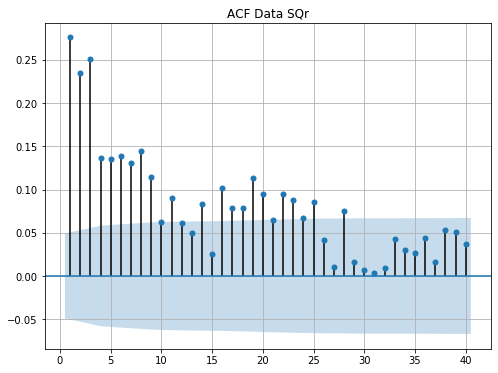

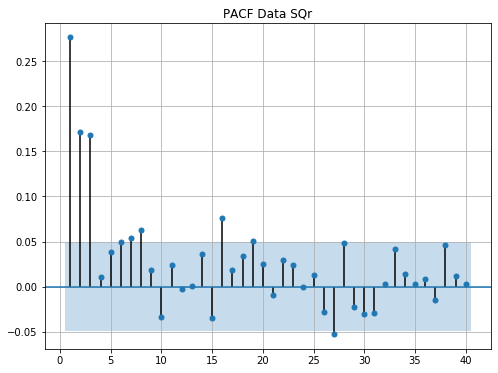

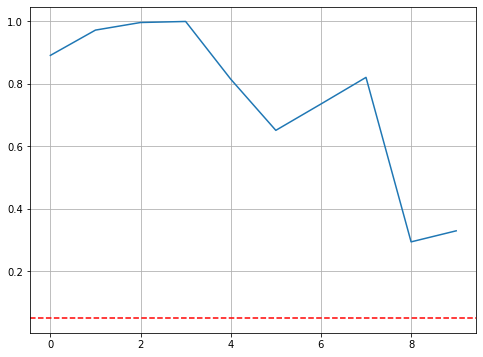

<Figure size 1080x864 with 0 Axes>

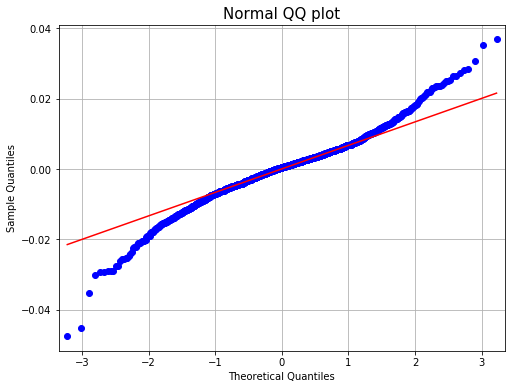

Jarque-Bera statitiscs:  460.4119068817393
Jarque-Bera p-value:  0.0
Shapiro statitiscs:  0.9685823321342468
Shapiro p-value:  5.0352502206797424e-18


In [115]:
plot_diagnostics(res, plt_PACF = True, plt_dataSqrACF=True, ljb=10)

In [123]:
#Important question: do further lags disappear now? NO¡

In [124]:
searchARMA(res2, exog, max_p=6, max_q = 6)

p: 0  q: 1  aic: -10554.255630483975
p: 0  q: 2  aic: -10552.293619197624
p: 0  q: 3  aic: -10550.294882124863
p: 0  q: 4  aic: -10548.29491152148
p: 0  q: 5  aic: -10548.616848008105
p: 1  q: 0  aic: -10554.255812811594
p: 2  q: 0  aic: -10552.293764751286
p: 2  q: 1  aic: -10551.037764529436
p: 2  q: 2  aic: -10555.107556268804
p: 3  q: 0  aic: -10550.296255553558
p: 3  q: 1  aic: -10549.252434943779
p: 3  q: 2  aic: -10550.83766741336
p: 3  q: 3  aic: -10559.374641217259
p: 4  q: 0  aic: -10548.29698393945
p: 4  q: 1  aic: -10547.90429765125
p: 4  q: 2  aic: -10551.764260931099
p: 4  q: 3  aic: -10552.764925315862
p: 5  q: 0  aic: -10548.480525044455
p: 5  q: 1  aic: -10547.8403008166
p: 5  q: 2  aic: -10545.869544027066
p: 5  q: 3  aic: -10554.143541302374
p: 5  q: 4  aic: -10547.172966098156


# Questions

In [125]:
df.head()

,GBPUSD,EURGBP,AAPL,SPY,SPYVol,SPYOpen,GOLD,FTSE,UKG,UST,AV,BH,BD
date,,,,,,,,,,,,,
2012-08-15,1.5679,0.7834,78.748901,140.95,71012147.0,140.64,155.63,5833.0000,2034.5,1.805,323.4,1284.564209,146.6
2012-08-16,1.5734,0.7851,79.436752,141.99,111977601.0,141.15,156.56,5834.5000,2027.0,1.836,326.7,1303.476440,145.9
2012-08-17,1.5697,0.7848,80.906044,142.18,90784837.0,142.23,156.72,5852.3999,2035.5,1.816,328.7,1300.489136,149.0
2012-08-20,1.5708,0.7856,83.033203,142.19,78199468.0,141.98,157.26,5824.3999,2033.5,1.814,325.0,1293.852905,152.2
2012-08-21,1.5782,0.7899,81.898483,141.76,105399601.0,142.54,158.83,5857.5000,2020.5,1.805,334.1,1313.426514,153.4


In [31]:
#SPY, AAPL, AV, BH, BD, UST, UKG, GBPUSD, EURGBP, GOLD,
FTSE=df['FTSE']
FTSERet = np.log(FTSE).diff().dropna()
dfex2=df[['SPY','AAPL','AV','BH','BD','UST','UKG','GBPUSD', 'EURGBP', 'GOLD']]
dfex2.head()

,SPY,AAPL,AV,BH,BD,UST,UKG,GBPUSD,EURGBP,GOLD
date,,,,,,,,,,
2012-08-15,140.95,78.748901,323.4,1284.564209,146.6,1.805,2034.5,1.5679,0.7834,155.63
2012-08-16,141.99,79.436752,326.7,1303.476440,145.9,1.836,2027.0,1.5734,0.7851,156.56
2012-08-17,142.18,80.906044,328.7,1300.489136,149.0,1.816,2035.5,1.5697,0.7848,156.72
2012-08-20,142.19,83.033203,325.0,1293.852905,152.2,1.814,2033.5,1.5708,0.7856,157.26
2012-08-21,141.76,81.898483,334.1,1313.426514,153.4,1.805,2020.5,1.5782,0.7899,158.83


In [32]:
dfex2=np.log(dfex2).diff().dropna()

In [33]:
dfex2.head()

,SPY,AAPL,AV,BH,BD,UST,UKG,GBPUSD,EURGBP,GOLD
date,,,,,,,,,,
2012-08-16,0.007351,0.008697,0.010152,0.014615,-0.004786,0.017029,-0.003693,0.003502,0.002168,0.005958
2012-08-17,0.001337,0.018327,0.006103,-0.002294,0.021025,-0.010953,0.004185,-0.002354,-0.000382,0.001021
2012-08-20,0.000070,0.025952,-0.011320,-0.005116,0.021249,-0.001102,-0.000983,0.000701,0.001019,0.003440
2012-08-21,-0.003029,-0.013760,0.027615,0.015015,0.007853,-0.004974,-0.006413,0.004700,0.005459,0.009934
2012-08-22,0.000423,0.019337,-0.016904,-0.016808,-0.025084,-0.048818,0.004937,0.006253,-0.001520,0.010709


In [34]:
#dfex2val=dfex2.values

In [35]:
X1 = dfex2
X1 = sm.add_constant(X1) # Need to add a constant to account for intercept
y = FTSERet

lm_0 = sm.OLS(y, X1).fit()
res = lm_0.resid
print(lm_0.summary())

                            OLS Regression Results                            
Dep. Variable:                   FTSE   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     366.8
Date:                Thu, 12 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:46:17   Log-Likelihood:                 6220.0
No. Observations:                1575   AIC:                        -1.242e+04
Df Residuals:                    1564   BIC:                        -1.236e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001      0.000     -0.974      0.3

In [36]:
#the statement asks for SPY, AV, BH, BD, UKG, GBPUSD, i.e. removing APPL, UST, EURGBP and GOLD. (all the not significant)

In [327]:
X1 = dfex2[['SPY','AV','BH','BD','UKG','GBPUSD']]
X1 = sm.add_constant(X1) # Need to add a constant to account for intercept
y = FTSERet

lm_1 = sm.OLS(y, X1).fit()
res1 = lm_1.resid
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                   FTSE   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     610.5
Date:                Thu, 12 Dec 2019   Prob (F-statistic):               0.00
Time:                        23:08:04   Log-Likelihood:                 6217.9
No. Observations:                1575   AIC:                        -1.242e+04
Df Residuals:                    1568   BIC:                        -1.238e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001      0.000     -0.979      0.3

In [38]:
print(lm_0.aic)
print(lm_1.aic)
print(lm_0.bic)
print(lm_1.bic)
print(lm_0.params)
print(lm_0.bse)
print(lm_1.params)
print(lm_1.bse)

-12418.092347768394
-12421.815664563659
-12359.110231704537
-12384.28159070484
const    -0.000115
SPY       0.200769
AAPL     -0.012526
AV        0.192702
BH        0.173428
BD        0.082227
UST      -0.009494
UKG      -0.091105
GBPUSD   -0.317240
EURGBP    0.020546
GOLD     -0.011948
dtype: float64
const     0.000118
SPY       0.019601
AAPL      0.008913
AV        0.009378
BH        0.006433
BD        0.006438
UST       0.008425
UKG       0.036551
GBPUSD    0.027402
EURGBP    0.028340
GOLD      0.014388
dtype: float64
const    -0.000116
SPY       0.182543
AV        0.192681
BH        0.172630
BD        0.082661
UKG      -0.070127
GBPUSD   -0.327730
dtype: float64
const     0.000118
SPY       0.016406
AV        0.009320
BH        0.006304
BD        0.006370
UKG       0.028892
GBPUSD    0.021670
dtype: float64


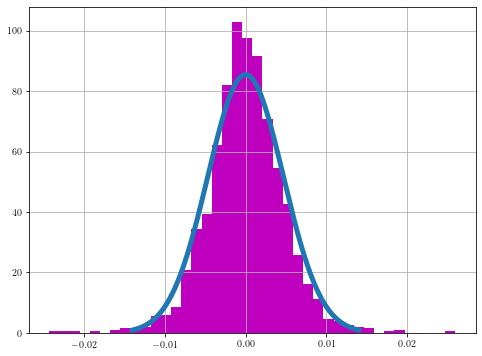

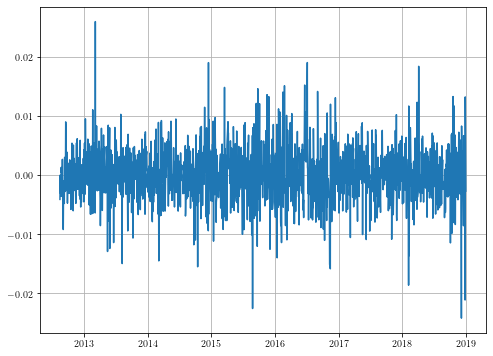

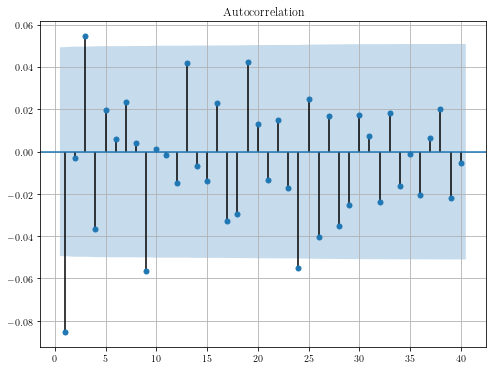

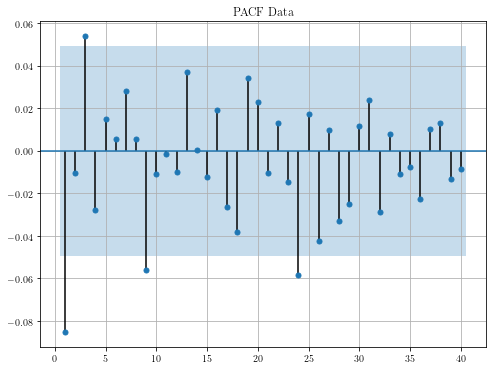

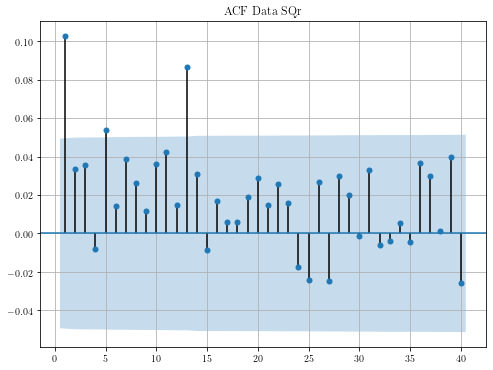

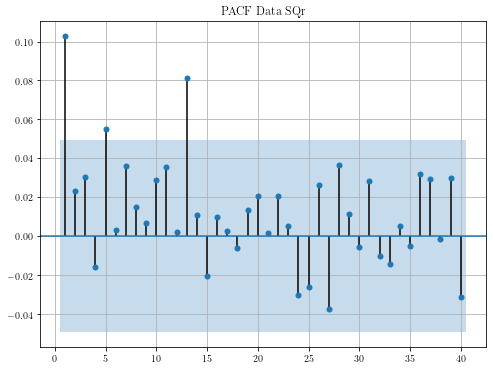

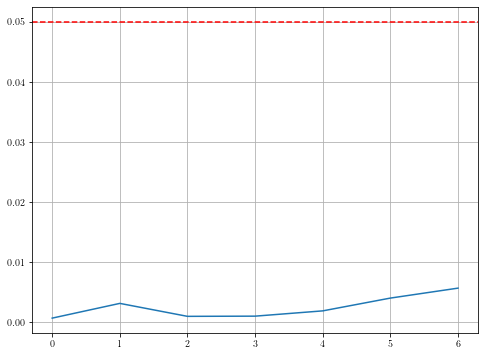

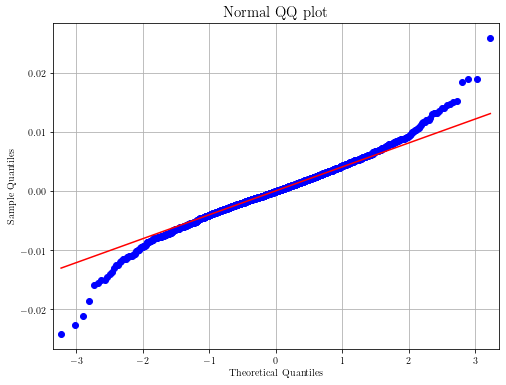

Jarque-Bera statitiscs:  363.6035614168864
Jarque-Bera p-value:  0.0
Shapiro statitiscs:  0.9794903993606567
Shapiro p-value:  3.2422046140510516e-14
Skewness: -0.004221971622159829
Kurtosis: 5.35383822672749


In [42]:
plot_diagnostics(res1, plt_PACF = True, plt_dataSqrACF=True, save=True)

In [69]:
def plot_diagnostics(data, ljb=0, plt_PACF =  True, plt_dataSqrACF=True, lags=40):
    if(ljb==0):
        m = int(np.log(len(data)))
        ljbtest = sm.stats.acorr_ljungbox(data,m)
    else:
        ljbtest = sm.stats.acorr_ljungbox(data,ljb)
            
    plt.hist(data, bins =40,color='m', density = True)
    mu = data.mean()
    sigma = data.std()
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 2419)
    plt.plot(x, stats.norm.pdf(x, mu, sigma), linewidth= 5)
    plt.grid()
    plt.show()
    plt.plot(data)
    plt.grid()
    plt.show()
    
    plot_acf(data,lags=lags,zero=False)
    plt.grid()
    plt.show()
    plot_pacf(data,lags=lags,zero=False)
    plt.title('PACF Data')
    plt.grid()
    plt.show()
    if(plt_dataSqrACF):
        plot_acf(data**2,lags=lags,zero=False)
        plt.title('ACF Data SQr')
        plt.grid()
        plt.show()
        plot_pacf(data**2,lags=lags,zero=False)#Also plot PACF if ACF is recquired
        plt.title('PACF Data SQr')
        plt.grid()
        plt.show()     
    plt.plot(ljbtest[1])
    plt.title('Ljung-Box text')
    plt.axhline(y=0.05, color='r',ls='--')
    plt.xlabel("Lags")
    plt.ylabel("p-value")
    #plt.xticks(fontsize = 13) 
    #plt.yticks(fontsize = 13)
    plt.grid()
    plt.show()
    fig = sm.qqplot(data, line='q')
    plt.title('Normal QQ plot', fontsize=15)
    plt.grid()
    plt.show()
    
    #Statistics:
    JB_test = stats.jarque_bera(data)
    print('Jarque-Bera statitiscs: ', JB_test[0])
    print('Jarque-Bera p-value: ', JB_test[1])
    shap_test = stats.shapiro(data)
    print('Shapiro statitiscs: ', shap_test[0])
    print('Shapiro p-value: ', shap_test[1])
    kurt=stats.kurtosis(data, fisher=False)
    sk=stats.skew(data)
    print('Skewness:', sk)
    print('Kurtosis:', kurt)

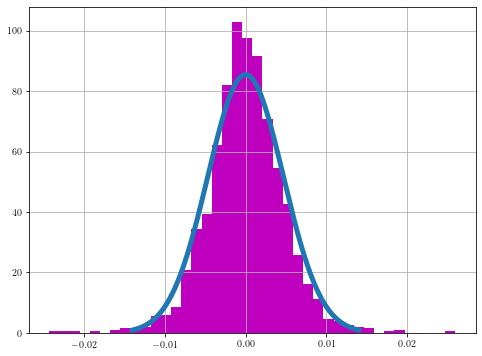

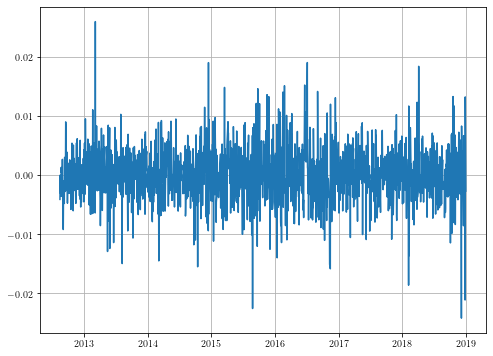

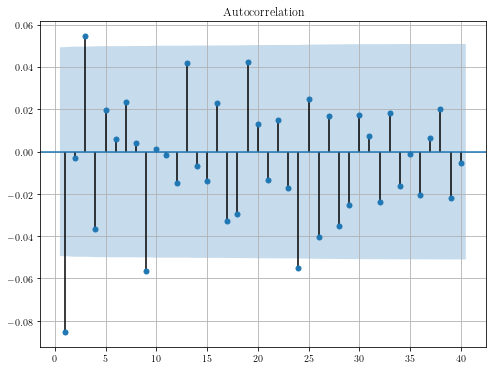

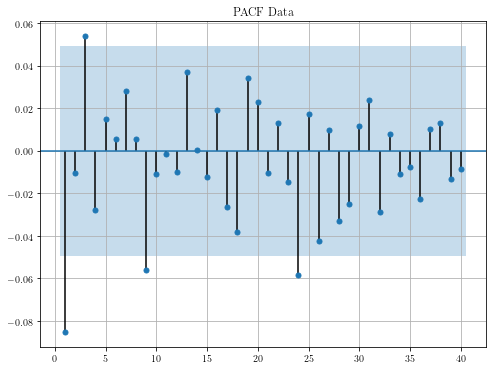

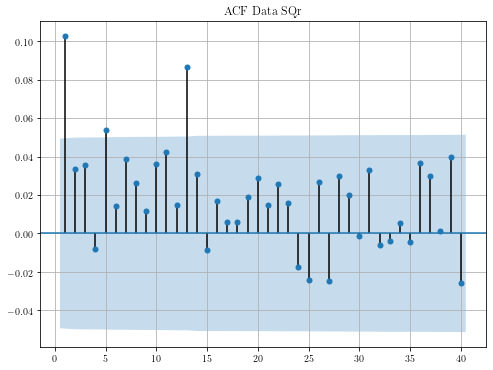

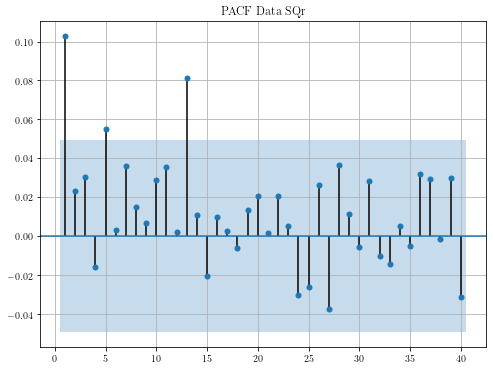

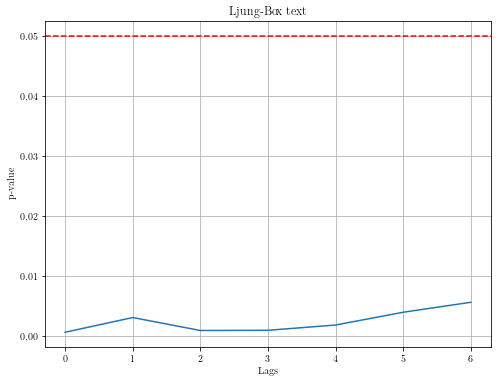

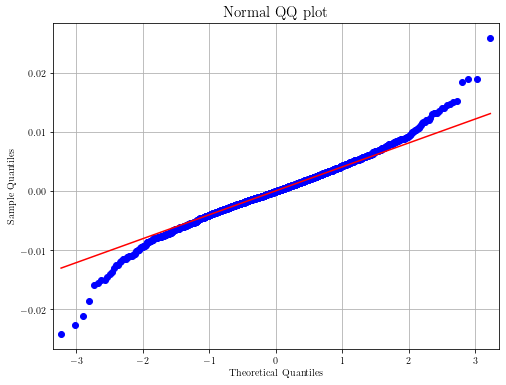

Jarque-Bera statitiscs:  363.6035614168864
Jarque-Bera p-value:  0.0
Shapiro statitiscs:  0.9794903993606567
Shapiro p-value:  3.2422046140510516e-14
Skewness: -0.004221971622159829
Kurtosis: 5.35383822672749


In [70]:
plot_diagnostics(res1, )

In [ ]:
    plot_acf(data,lags=lags,zero=False)
    plt.grid()
    plt.show()
    plot_pacf(data,lags=lags,zero=False)
    plt.title('PACF Data')
    plt.grid()
    plt.show()
    if(plt_dataSqrACF):
        plot_acf(data**2,lags=lags,zero=False)
        plt.title('ACF Data SQr')
        plt.grid()
        plt.show()
        plot_pacf(data**2,lags=lags,zero=False)#Also plot PACF if ACF is recquired
        plt.title('PACF Data SQr')
        plt.grid()
        plt.show()     
    plt.plot(ljbtest[1])
    plt.title('Ljung-Box text')
    plt.axhline(y=0.05, color='r',ls='--')
    plt.xlabel("Lags")
    plt.ylabel("p-value")
    #plt.xticks(fontsize = 13) 
    #plt.yticks(fontsize = 13)
    plt.grid()
    plt.show()
    fig = sm.qqplot(data, line='q')
    plt.title('Normal QQ plot', fontsize=15)
    plt.grid()
    plt.show()
plt.savefig("diagnostics.jpg", bbox_inches='tight')
plt.show()

In [333]:
#Improve simple code below to improve display
def plot_diagnosticsTight2(data, title1 = 'Residuals Diff Differenced Data', lags=40):

    fig, axes = plt.subplots(1,2,figsize=(15,5))
    axes[0].set_ylabel('ACF', fontsize=13)
    axes[0].set_xlabel('Lag', fontsize=13)
    fig = plot_acf(data,lags=lags,zero=False, ax = axes[0], title= 'ACF '+ title1, use_vlines = True)
    axes[1].set_ylabel('PACF', fontsize=13)
    axes[1].set_xlabel('Lag', fontsize=13)
    fig = plot_pacf(data,lags=lags,zero=False, ax = axes[1], title= 'PACF '+ title1, use_vlines = True)
    plt.tight_layout()
    plt.savefig("ACF2.png", dpi = 300)

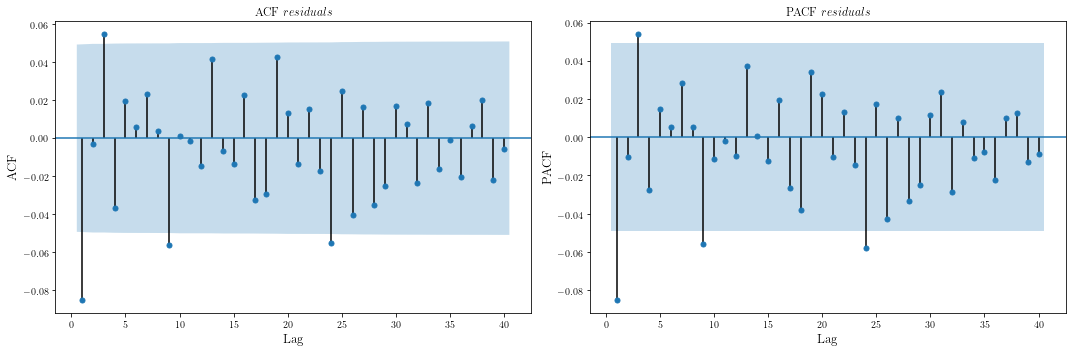

In [342]:
plot_diagnosticsTight2(res1, title1 = '$residuals$ ',lags=40) 

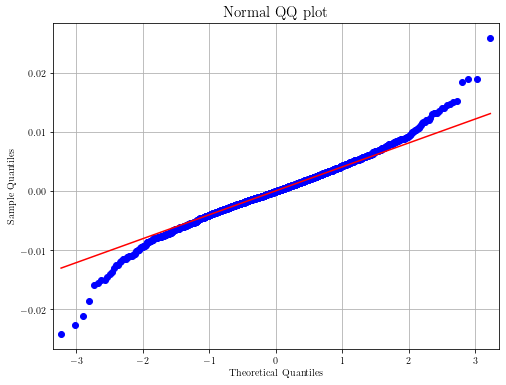

In [338]:
    fig = sm.qqplot(res1, line='q')
    plt.title('Normal QQ plot', fontsize=15)
    plt.grid()
    plt.savefig("qqplot.jpg", bbox_inches='tight')
    plt.show()

In [ ]:
#apartado c

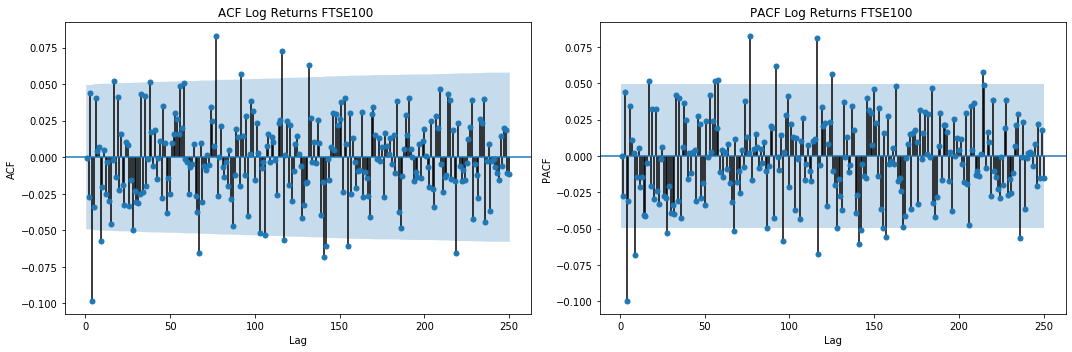

In [188]:
plot_diagnosticsTight2(FTSERet, title1 = 'Log Returns FTSE100 ',lags=250) 

In [189]:
#CHECK STATIONARITY. ADF AND KPSS
test = adfuller(FTSERet)
print('ADF Statistic: %f' % test[0])
print('p-value: %f' % test[1])
print('Critical Values:i/')
for item, value in test[4].items():
    print('\t%s: %.2f' % (item, value))
    
test = kpss(FTSERet) 
print('KPSS Statistic: %f' % test[0])
print('p-value: %f' % test[1])
print('Critical Values:')
for item, value in test[3].items():
    print('\t%s: %.2f' % (item, value))

ADF Statistic: -14.344006
p-value: 0.000000
Critical Values:i/
	1%: -3.43
	5%: -2.86
	10%: -2.57
KPSS Statistic: 0.103040
p-value: 0.100000
Critical Values:
	10%: 0.35
	5%: 0.46
	2.5%: 0.57
	1%: 0.74


In [192]:
X1 = dfex2[['SPY','AV','BH','BD','UKG','GBPUSD']]
ARX_results = ARMA(y, exog = X1,order=(1,0)).fit()
res=ARX_results.resid
print(ARX_results.summary());

                              ARMA Model Results                              
Dep. Variable:                   FTSE   No. Observations:                 1575
Model:                     ARMA(1, 0)   Log Likelihood                6224.274
Method:                       css-mle   S.D. of innovations              0.005
Date:                Wed, 11 Dec 2019   AIC                         -12430.548
Time:                        16:26:25   BIC                         -12382.290
Sample:                             0   HQIC                        -12412.614
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001      0.000     -1.136      0.256      -0.000    8.85e-05
SPY            0.2003      0.017     11.673      0.000       0.167       0.234
AV             0.1901      0.009     20.442      0.0

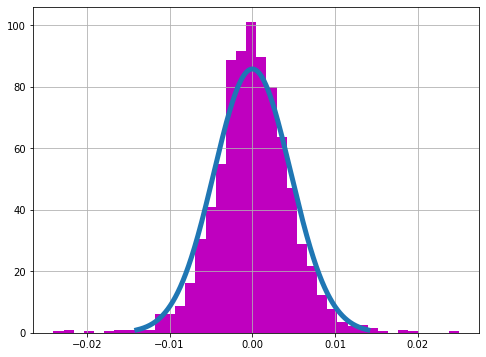

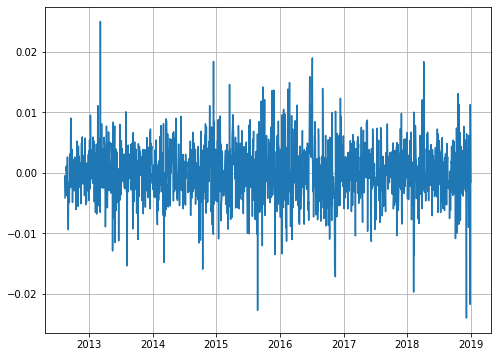

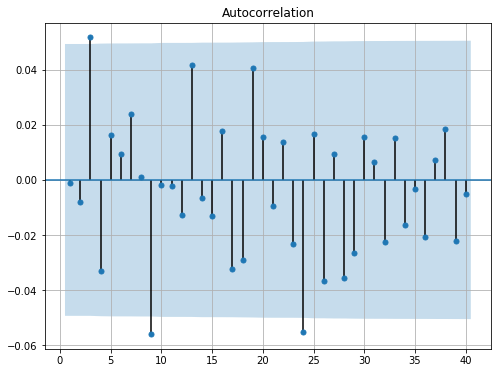

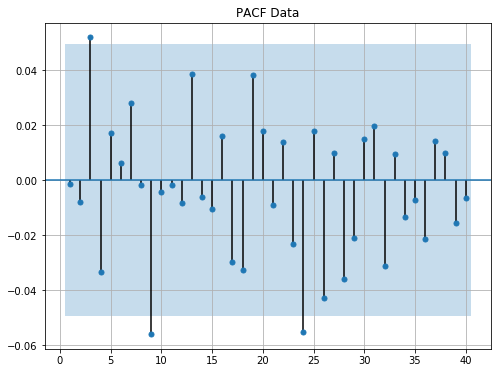

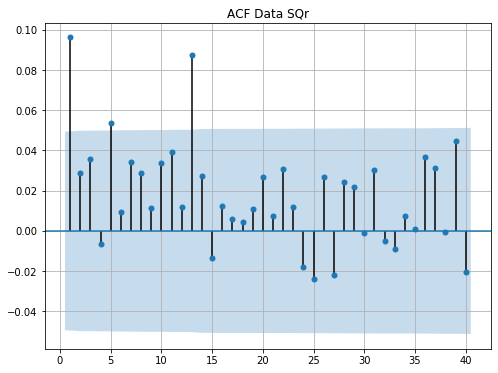

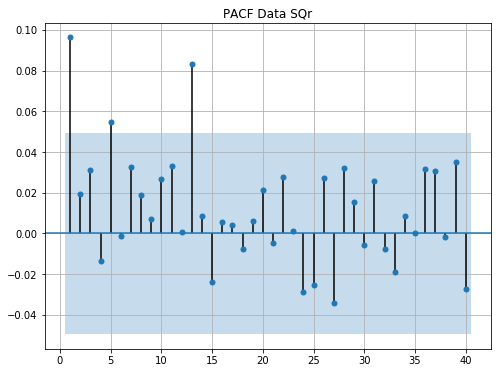

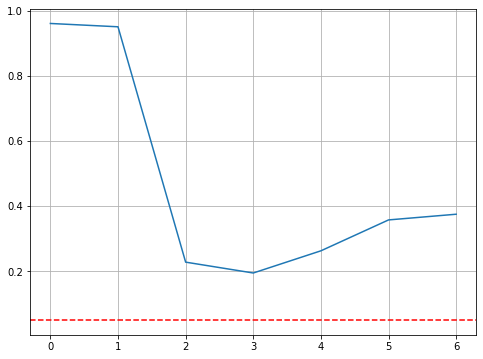

<Figure size 1080x864 with 0 Axes>

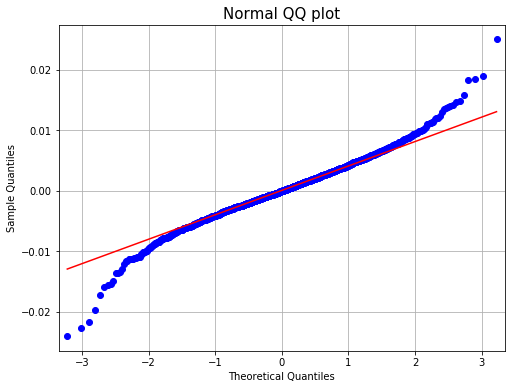

Jarque-Bera statitiscs:  370.11254509368393
Jarque-Bera p-value:  0.0
Shapiro statitiscs:  0.9791676998138428
Shapiro p-value:  2.3996379021210337e-14
Skewness: -0.06869944376643586
Kurtosis: 5.37085042899296


In [201]:
plot_diagnostics(res, plt_PACF = True, plt_dataSqrACF=True)

In [197]:
stats.kurtosis(res, fisher=False)

5.37085042899296

# MODELLING

In [123]:
expert_align.head()
print(expert[expert.index[:2]])
print(expert_align[expert_align.index[30:32]])
print(expert_align[expert_align.index[:2]])
print(FTSE.head())
print(expert_align.tail())
expert_align[-31:-30]
expert_align[30:31]
expert_align_cut=expert_align[30:-30] #already checked

date
2012-07-03    5855.101271
2012-07-05    5686.129754
dtype: float64
date
2012-08-15    5855.101271
2012-08-16    5686.129754
dtype: float64
date
2012-07-03   NaN
2012-07-05   NaN
dtype: float64
date
2012-08-15    5833.0000
2012-08-16    5834.5000
2012-08-17    5852.3999
2012-08-20    5824.3999
2012-08-21    5857.5000
Name: FTSE, dtype: float64
date
2019-02-06    7102.450164
2019-02-07    7071.055180
2019-02-08    7125.765860
2019-02-11    7143.931059
2019-02-12    7205.362083
dtype: float64


In [124]:
expert_align_clean=expert_align[expert_align.index[30:]]
print(FTSE.head())
print(expert_align_clean.head())
print(FTSE.tail())
expert_align_clean.tail(35)

date
2012-08-15    5833.0000
2012-08-16    5834.5000
2012-08-17    5852.3999
2012-08-20    5824.3999
2012-08-21    5857.5000
Name: FTSE, dtype: float64
date
2012-08-15    5855.101271
2012-08-16    5686.129754
2012-08-17    5902.311989
2012-08-20    5916.024803
2012-08-21    5940.475237
dtype: float64
date
2018-12-21    6721.2002
2018-12-24    6686.0000
2018-12-27    6584.7002
2018-12-28    6734.0000
2018-12-31    6728.1001
Name: FTSE, dtype: float64


date
2018-12-21    6705.565044
2018-12-24    6682.022102
2018-12-27    6584.557737
2018-12-28    6730.053341
2018-12-31    6740.243561
2019-01-02    6744.720972
2019-01-03    6694.576035
2019-01-04    6852.741475
2019-01-07    6795.515616
2019-01-08    6854.955535
2019-01-09    6911.111961
2019-01-10    6945.410368
2019-01-11    6904.453616
2019-01-14    6867.737020
2019-01-15    6893.959252
2019-01-16    6859.274553
2019-01-17    6836.257056
2019-01-18    6984.200133
2019-01-21    6899.446673
2019-01-22    6831.842188
2019-01-23    6809.207363
2019-01-24    6820.174534
2019-01-25    6746.455627
2019-01-28    6842.461959
2019-01-29    6930.823332
2019-01-30    6960.189987
2019-01-31    7019.472496
2019-02-01    7020.360762
2019-02-04    7156.077168
2019-02-05    7182.326493
2019-02-06    7102.450164
2019-02-07    7071.055180
2019-02-08    7125.765860
2019-02-11    7143.931059
2019-02-12    7205.362083
dtype: float64

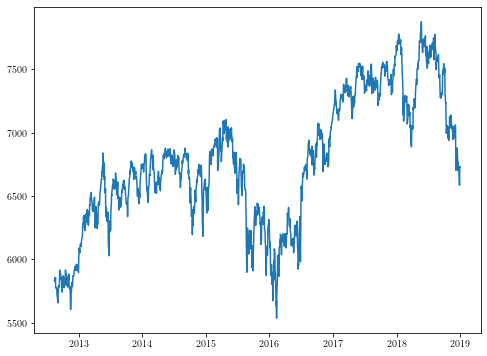

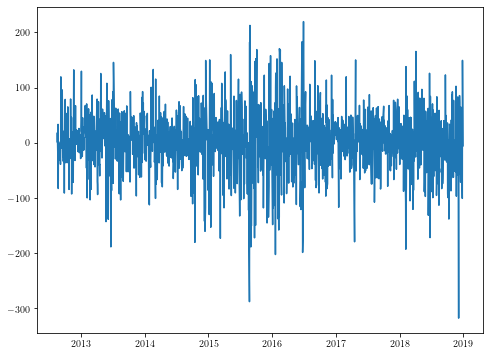

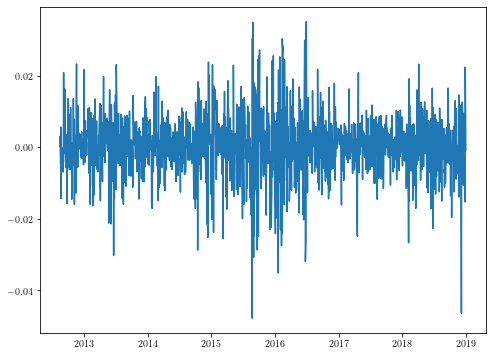

In [125]:
dfex2=df[['SPY','AAPL','AV','BH','BD','UST','UKG','GBPUSD', 'EURGBP', 'GOLD']]
dfex2=np.log(dfex2).diff().dropna()
X1 = dfex2[['SPY','AV','BH','BD','UKG','GBPUSD']]
plt.plot(FTSE)
FTSERet = np.log(FTSE).diff().dropna()
FTSERet2 = FTSE.diff().dropna()
plt.show()
plt.plot(FTSERet2)
plt.show()
plt.plot(FTSERet)
plt.show()

In [126]:
#CHECK STATIONARITY. ADF AND KPSS
#also try simple Ret
test = adfuller(FTSERet2)
print('ADF Statistic: %f' % test[0])
print('p-value: %f' % test[1])
print('Critical Values:i/')
for item, value in test[4].items():
    print('\t%s: %.2f' % (item, value))
    
test = kpss(FTSERet2) 
print('KPSS Statistic: %f' % test[0])
print('p-value: %f' % test[1])
print('Critical Values:')
for item, value in test[3].items():
    print('\t%s: %.2f' % (item, value))

ADF Statistic: -21.238405
p-value: 0.000000
Critical Values:i/
	1%: -3.43
	5%: -2.86
	10%: -2.57
KPSS Statistic: 0.101430
p-value: 0.100000
Critical Values:
	10%: 0.35
	5%: 0.46
	2.5%: 0.57
	1%: 0.74


In [155]:
len(FTSERet)

1575

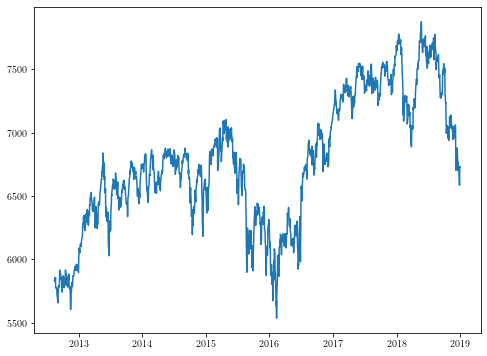

In [156]:
plt.plot(FTSE)

In [129]:
pacf=sm_tools.pacf(FTSERet2,nlags=800)
pacf[713:720] #maximum in 715

array([-0.6499941 , -1.10821972,  3.29866677,  1.74051981, -1.94791878,
        0.40871021,  0.67265286])

In [78]:
loc = pacf.max()
loc
#logprice['RRP'][loc]=percent_replace

3.2986667701151053

AttributeError: 'numpy.ndarray' object has no attribute 'set_ylabel'

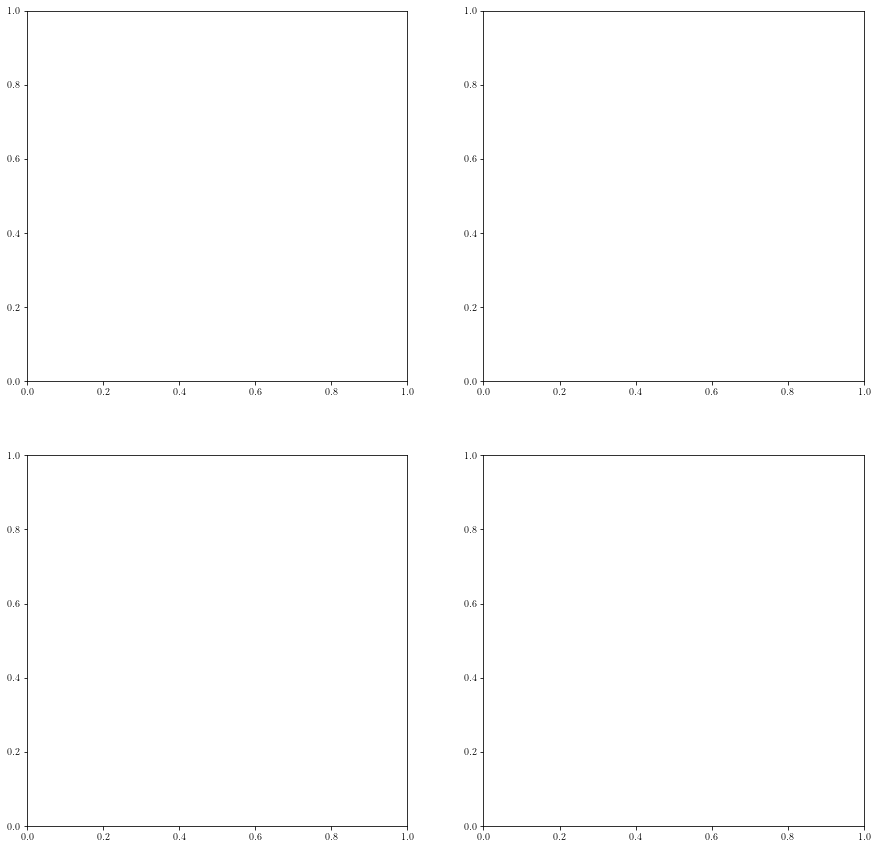

In [79]:
plot_diagnosticsTight2(FTSERet2, title1 = 'Residuals Diff Differenced Data',lags=800) 

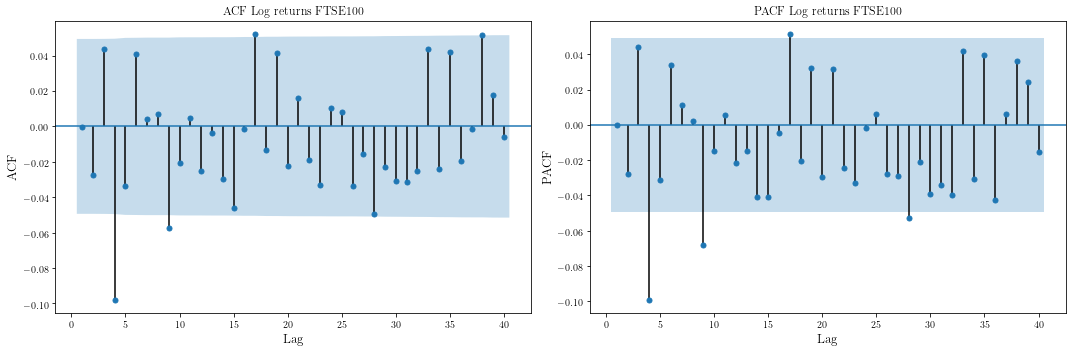

In [344]:
plot_diagnosticsTight2(FTSERet, title1 = 'Log returns FTSE100',lags=40) 

In [31]:
pacfret=sm_tools.pacf(FTSERet,nlags=800)
pacfret2=sm_tools.pacf(FTSERet2,nlags=800)

In [32]:
print(pacfret[720:740]) #732
print(pacfret2[710:730]) #715  

[-0.21745469 -0.17351951  0.12664345  0.35055257  0.19022626 -0.12770172
 -0.33819063 -0.36224456 -0.0170649   0.20196712  0.49409153  0.96866732
 15.65089647 -0.9440832   2.69127352  0.21693632 -0.60993129 -0.67128392
 -0.39774167  0.24978535]
[ 0.23629656  0.10744056 -0.33810374 -0.6499941  -1.10821972  3.29866677
  1.74051981 -1.94791878  0.40871021  0.67265286  0.50207236  0.19738493
 -0.08536292 -0.25861295 -0.24490219 -0.05229089  0.11934085  0.17288308
  0.17159591 -0.0698796 ]


In [30]:
X1 = dfex2[['SPY','AV','BH','BD','UKG','GBPUSD']]
X1 = sm.add_constant(X1) # Need to add a constant to account for intercept
y = FTSERet

lm_1 = sm.OLS(y, X1).fit()
res1 = lm_1.resid

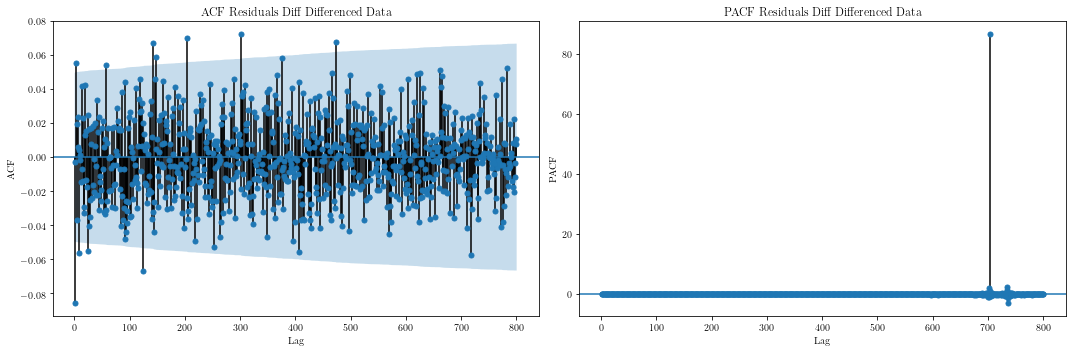

In [344]:
plot_diagnosticsTight2(res1, title1 = 'Residuals Diff Differenced Data',lags=800) 

In [352]:
#agrego a X1 coseno, seno, y las predicciones (expert_align_cut): X1ampliado
t=np.arange(len(FTSERet))
cos=np.cos(2*np.pi*t/750)
sin=np.sin(2*np.pi*t/750)

In [353]:
X1['cos']=cos
X1['sin']=sin
X1['t']=t
X1['expert']=expert_align_cut

In [351]:
X1.tail()

,const,SPY,AV,BH,BD,UKG,GBPUSD
date,,,,,,,
2018-12-21,1.0,-0.026525,0.005122,0.015760,0.014260,-0.004956,-0.001977
2018-12-24,1.0,-0.026778,0.000806,-0.007666,-0.016282,0.007865,0.005606
2018-12-27,1.0,0.056938,-0.020630,-0.016006,0.002919,-0.008859,-0.004656
2018-12-28,1.0,-0.001291,0.032383,0.015762,0.028949,0.004468,0.004420
2018-12-31,1.0,0.008721,-0.002925,0.008879,0.008027,-0.001762,0.004087


In [170]:
X1=sm.add_constant(X1)

In [171]:
pacfc=sm_tools.pacf(resc,nlags=800)

In [172]:
pacf1=sm_tools.pacf(res1,nlags=800)

In [173]:
print(pacf1[700:715]) #703
print(pacfc[690:715]) #700  and further

[-8.12794473e-01  1.97804462e+00 -9.57851101e-01  8.65539490e+01
  9.96331951e-01 -3.96403568e-01 -4.65550208e-01  1.61563291e-02
  3.20446408e-01 -2.71923668e-02 -2.88404279e-01 -4.32955906e-02
  9.68771555e-02  2.14778060e-01 -1.59105567e-01]
[ 0.12305021  0.11053968 -0.03117861 -0.02514196 -0.14332913 -0.01510309
 -0.15491744 -0.05539516 -0.08550981 -0.12661933  0.03795724  0.03417252
 -0.01496575  0.10468253  0.00776485  0.01274155 -0.00561585 -0.02339829
  0.01825249 -0.00295679 -0.16750369 -0.12680289  0.02962657 -0.04039309
 -0.04439308]


In [361]:
X1.head()

,const,SPY,AV,BH,BD,UKG,GBPUSD,cos,sin,t,expert
date,,,,,,,,,,,
2012-08-16,1.0,0.007351,0.010152,0.014615,-0.004786,-0.003693,0.003502,1.000000,0.000000,0,5686.129754
2012-08-17,1.0,0.001337,0.006103,-0.002294,0.021025,0.004185,-0.002354,0.999965,0.008377,1,5902.311989
2012-08-20,1.0,0.000070,-0.011320,-0.005116,0.021249,-0.000983,0.000701,0.999860,0.016754,2,5916.024803
2012-08-21,1.0,-0.003029,0.027615,0.015015,0.007853,-0.006413,0.004700,0.999684,0.025130,3,5940.475237
2012-08-22,1.0,0.000423,-0.016904,-0.016808,-0.025084,0.004937,0.006253,0.999439,0.033504,4,5925.131314


In [354]:
#y = np.log(FTSE[1:])
y=FTSE[1:]
lm = sm.OLS(y, X1[['const','sin','cos','t']]).fit()
res = lm.resid

In [363]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   FTSE   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     1337.
Date:                Fri, 13 Dec 2019   Prob (F-statistic):               0.00
Time:                        00:27:25   Log-Likelihood:                -11075.
No. Observations:                1575   AIC:                         2.216e+04
Df Residuals:                    1571   BIC:                         2.218e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6212.6405     14.500    428.451      0.0

In [364]:
FTSE.index[998]

Timestamp('2016-08-26 00:00:00')

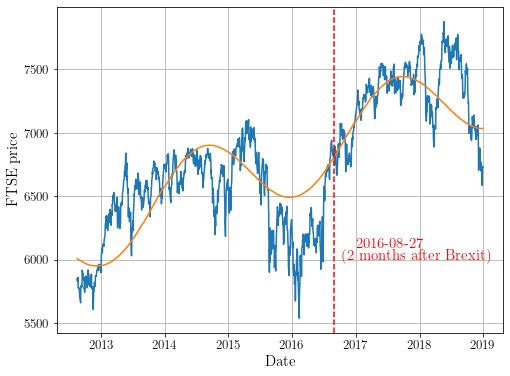

In [371]:
plt.plot(FTSE[1:])
plt.plot(lm.fittedvalues)
#rescdif=resc.diff().dropna()
plt.xlabel("Date", fontsize=15)
plt.ylabel("FTSE price", fontsize=15);
plt.xticks(fontsize = 13) 
plt.yticks(fontsize = 13)
plt.grid()
#plt.legend(('Data','Fitted values'),fontsize=13.5)
plt.text(FTSE.index[1030],6000,r'2016-08-27 \\ (2 months after Brexit)',fontsize=15,color='red')
plt.axvline(FTSE.index[998],color='r',linestyle='--')

plt.savefig("model1.jpg", bbox_inches='tight')

plt.show()

In [85]:
y = FTSERet
lm_complete = sm.OLS(y, X1).fit()
resc = lm_complete.resid

In [139]:
print(lm_complete.summary())

                            OLS Regression Results                            
Dep. Variable:                   FTSE   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     564.2
Date:                Thu, 12 Dec 2019   Prob (F-statistic):          8.76e-249
Time:                        18:01:30   Log-Likelihood:                 2384.5
No. Observations:                1575   AIC:                            -4761.
Df Residuals:                    1571   BIC:                            -4740.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -29.6024      6.238     -4.746      0.0

# A PARTIR DE AQUI IMPORTANTE

In [181]:
del(X1['sin'])
del(X1['cos'])

In [374]:
X1.head()

,const,SPY,AV,BH,BD,UKG,GBPUSD,cos,sin,t,expert
date,,,,,,,,,,,
2012-08-16,1.0,0.007351,0.010152,0.014615,-0.004786,-0.003693,0.003502,1.000000,0.000000,0,5686.129754
2012-08-17,1.0,0.001337,0.006103,-0.002294,0.021025,0.004185,-0.002354,0.999965,0.008377,1,5902.311989
2012-08-20,1.0,0.000070,-0.011320,-0.005116,0.021249,-0.000983,0.000701,0.999860,0.016754,2,5916.024803
2012-08-21,1.0,-0.003029,0.027615,0.015015,0.007853,-0.006413,0.004700,0.999684,0.025130,3,5940.475237
2012-08-22,1.0,0.000423,-0.016904,-0.016808,-0.025084,0.004937,0.006253,0.999439,0.033504,4,5925.131314


In [385]:
reg = dfex2[['SPY','AV','BH','BD','UKG','GBPUSD']]
model=sm.tsa.SARIMAX(FTSERet,order=(1,0,0),exog=reg).fit()
print(model.summary())
res=model.resid

In [386]:
print(model.summary())
res=model.resid

                           Statespace Model Results                           
Dep. Variable:                   FTSE   No. Observations:                 1575
Model:               SARIMAX(1, 0, 0)   Log Likelihood                6223.058
Date:                Fri, 13 Dec 2019   AIC                         -12430.115
Time:                        01:28:29   BIC                         -12387.219
Sample:                             0   HQIC                        -12414.174
                               - 1575                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
SPY            0.1818      0.011     16.860      0.000       0.161       0.203
AV             0.1928      0.005     42.361      0.000       0.184       0.202
BH             0.1727      0.005     32.691      0.0

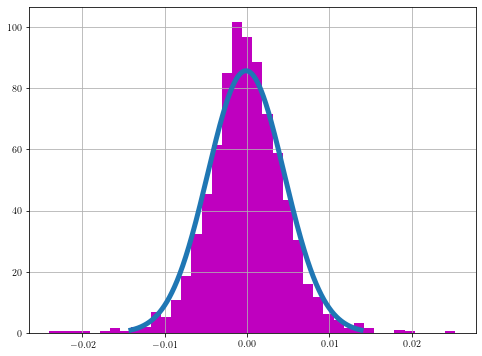

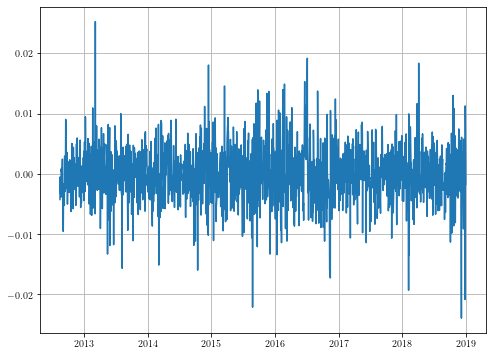

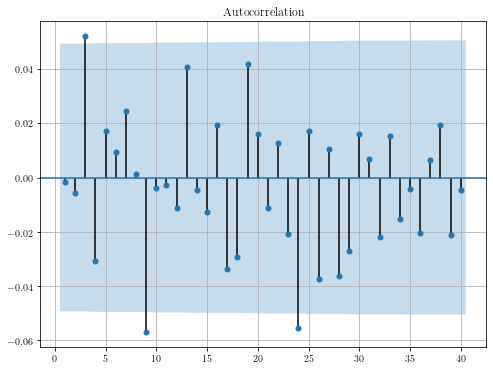

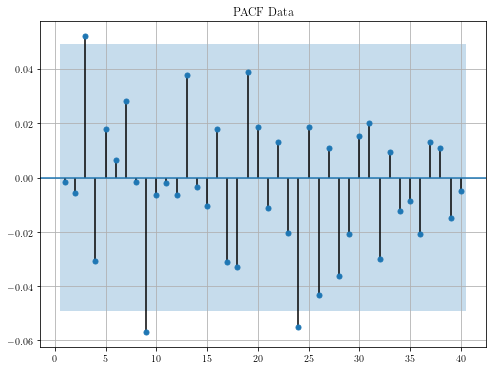

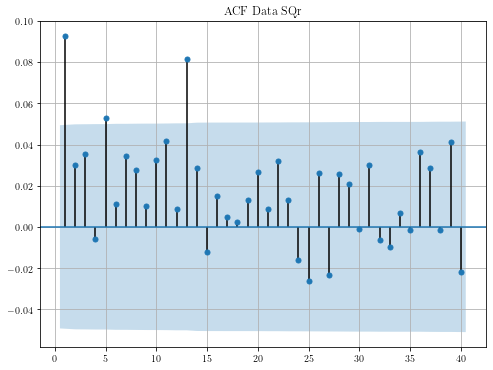

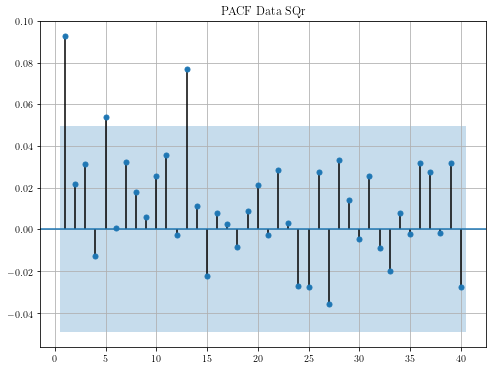

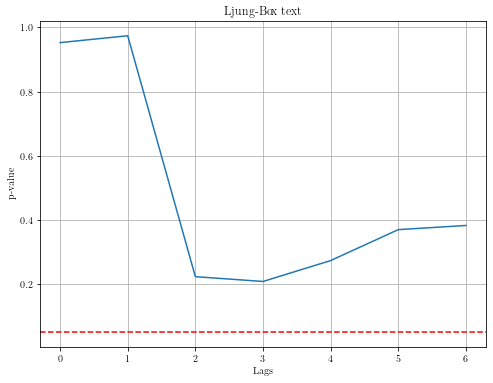

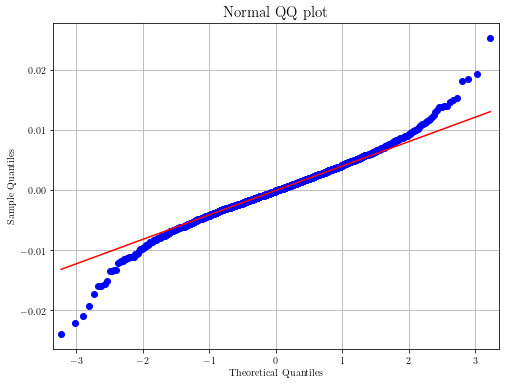

Jarque-Bera statitiscs:  347.7601408050729
Jarque-Bera p-value:  0.0
Shapiro statitiscs:  0.9799190163612366
Shapiro p-value:  4.8596611218650054e-14
Skewness: -0.03965498442258303
Kurtosis: 5.300632972562744


In [389]:
plot_diagnostics(res, plt_PACF = True, plt_dataSqrACF=True, ljb=0, lags=40)

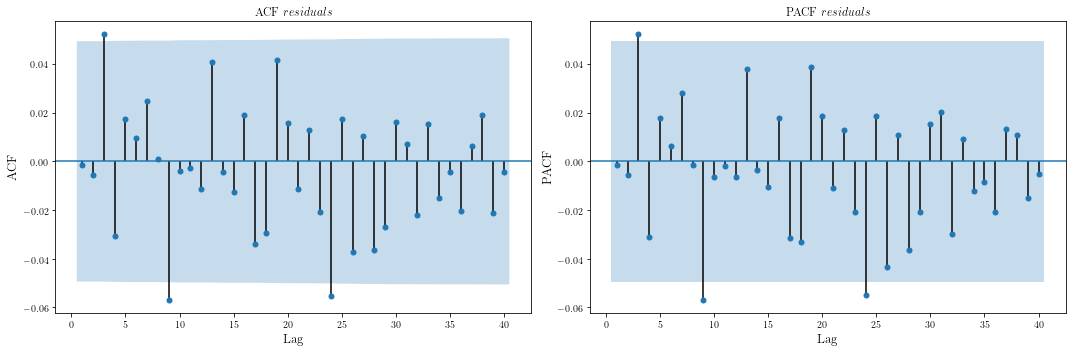

In [394]:
plot_diagnosticsTight2(res, title1 = '$residuals$',lags=40) 
#
#

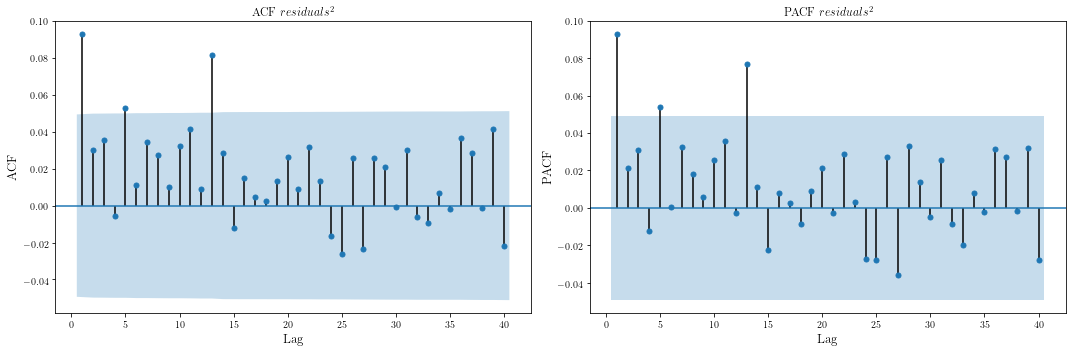

In [395]:
plot_diagnosticsTight2(res**2, title1 = '$residuals^2$ ',lags=40)

In [393]:
m = int(np.log(len(res)))
ljbtest = sm.stats.acorr_ljungbox(res**2,m)
ljbtest[1]

array([0.00022299, 0.0005403 , 0.00069264, 0.00185113, 0.00064101,
       0.00135671, 0.00132347])

In [198]:
del(X1['const'])

In [436]:
del(X1['t'])

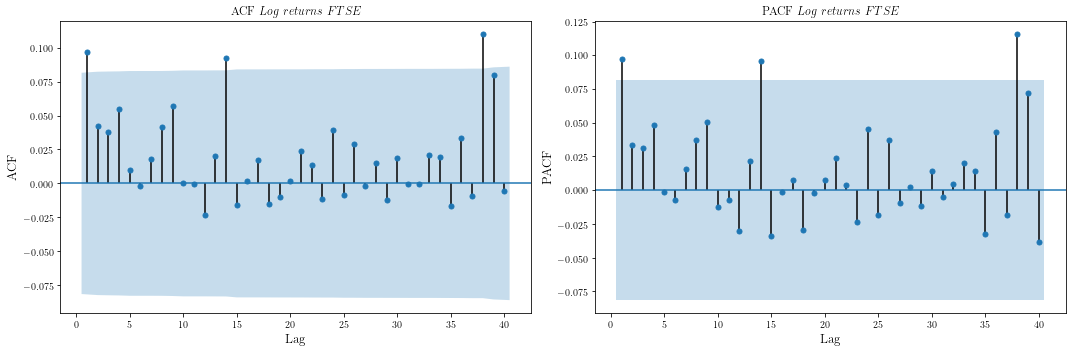

In [448]:
plot_diagnosticsTight2(FTSERet2cut**2,title1 = '$Log ~returns~ FTSE$', lags=40)

In [449]:
m = int(np.log(len(FTSERetcut**2)))
ljbtest = sm.stats.acorr_ljungbox(FTSERetcut**2,m)
ljbtest[1]

array([0.0216586 , 0.0407945 , 0.05313746, 0.04697204, 0.08430657,
       0.1378376 ])

In [431]:
exog = np.arange(1)
exog=X2 #X2 IS X1 CUT
#exog=X1 
#searchARMA(FTSERet, exog=exog, max_p=5, max_q = 5)
#searchARMA(FTSERet2, exog=exog, max_p=6, max_q = 6)
#searchARMA(FTSERet, exog=exog, max_p=5, max_q = 5)
#searchARMA(FTSERet2cut, exog=exog, max_p=5, max_q = 5)

p: 0  q: 1  aic: -10534.066271639835
p: 0  q: 2  aic: -10533.557824191712
p: 0  q: 3  aic: -10534.267382172433
p: 0  q: 4  aic: -10547.03796041736
p: 1  q: 0  aic: -10534.066270744755
p: 1  q: 4  aic: -10546.826582018426
p: 2  q: 0  aic: -10533.256809322938
p: 2  q: 1  aic: -10536.268455544121
p: 3  q: 0  aic: -10534.34871759364
p: 3  q: 1  aic: -10537.238515713194
p: 3  q: 2  aic: -10541.306581034745
p: 4  q: 0  aic: -10547.9925364462
p: 4  q: 1  aic: -10546.844071699565
p: 4  q: 2  aic: -10550.176112001047
p: 4  q: 3  aic: -10550.149377927051


In [433]:
#model2 = sm.tsa.SARIMAX(FTSERetcut2, order=(4, 0, 0),trend='c')
#model2 = sm.tsa.SARIMAX(FTSERetcut2, order=(3, 0, 0), exog=X1,trend='c')
#model2 = sm.tsa.SARIMAX(FTSERetcut, order=(1, 0, 0),trend='c')
#model2 = sm.tsa.SARIMAX(FTSERetcut, order=(1, 0, 0), exog=X2,trend='c')

#model2 = sm.tsa.SARIMAX(FTSERet, order=(4, 0, 0),trend='c')
#model2 = sm.tsa.SARIMAX(FTSERet, order=(4, 0, 0), exog=X1,trend='c')
#model2 = sm.tsa.SARIMAX(FTSERetcut2, order=(3, 0, 0), exog=X1,trend='c')
#model2 = sm.tsa.SARIMAX(FTSERetcut, order=(1, 0, 0),trend='c')
#model2 = sm.tsa.SARIMAX(FTSERetcut, order=(1, 0, 0), exog=X2,trend='c')


fit2 = model2.fit()
res2=fit2.resid
print(fit2.summary());

                           Statespace Model Results                           
Dep. Variable:                   FTSE   No. Observations:                 1575
Model:               SARIMAX(4, 0, 0)   Log Likelihood                6228.054
Date:                Fri, 13 Dec 2019   AIC                         -12422.109
Time:                        03:09:51   BIC                         -12330.955
Sample:                             0   HQIC                        -12388.234
                               - 1575                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   5.272e-06      0.001      0.004      0.996      -0.002       0.002
const         -0.0046      0.001     -3.678      0.000      -0.007      -0.002
SPY            0.1821      0.011     16.186      0.0

In [373]:
#X1.head()

,const,SPY,AV,BH,BD,UKG,GBPUSD,cos,sin,t,expert
date,,,,,,,,,,,
2012-08-16,1.0,0.007351,0.010152,0.014615,-0.004786,-0.003693,0.003502,1.000000,0.000000,0,5686.129754
2012-08-17,1.0,0.001337,0.006103,-0.002294,0.021025,0.004185,-0.002354,0.999965,0.008377,1,5902.311989
2012-08-20,1.0,0.000070,-0.011320,-0.005116,0.021249,-0.000983,0.000701,0.999860,0.016754,2,5916.024803
2012-08-21,1.0,-0.003029,0.027615,0.015015,0.007853,-0.006413,0.004700,0.999684,0.025130,3,5940.475237
2012-08-22,1.0,0.000423,-0.016904,-0.016808,-0.025084,0.004937,0.006253,0.999439,0.033504,4,5925.131314


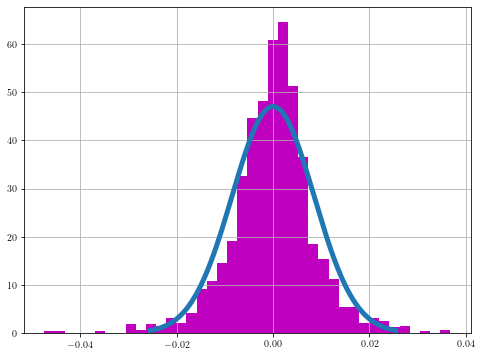

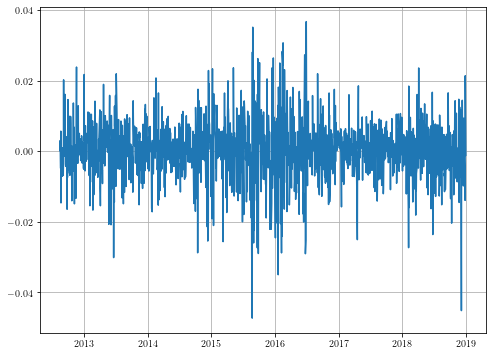

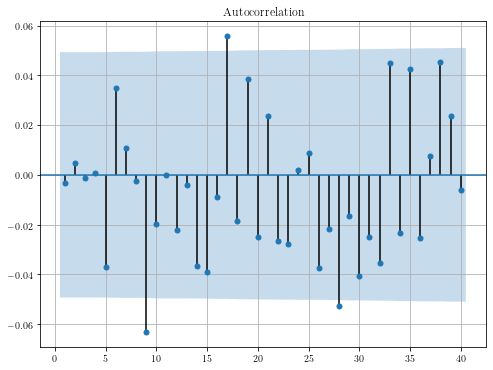

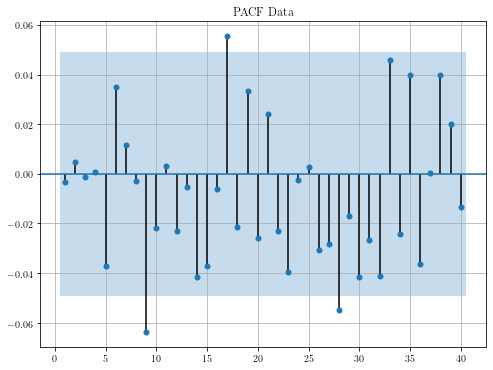

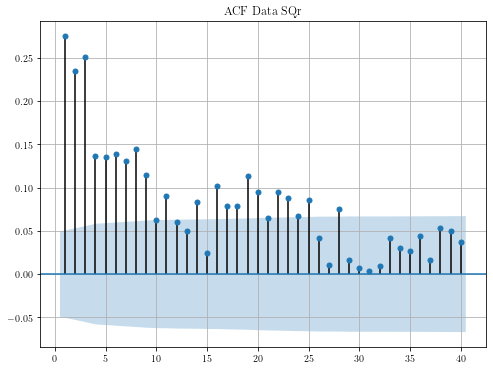

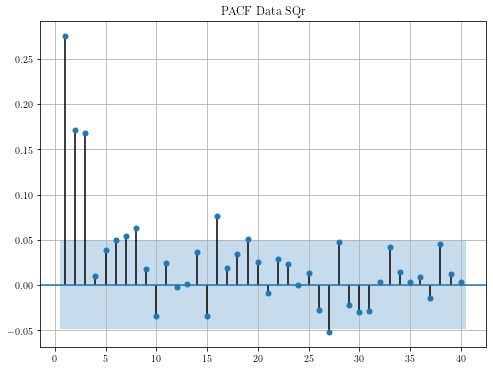

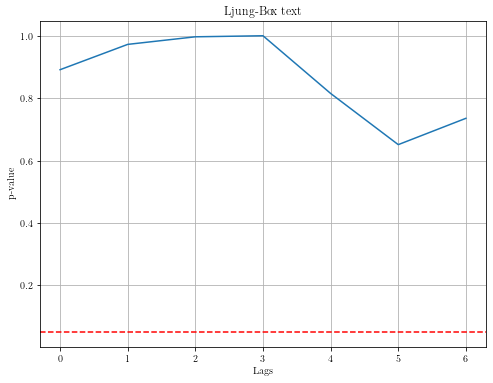

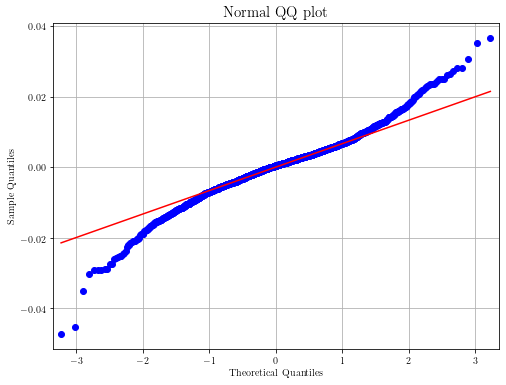

Jarque-Bera statitiscs:  460.4119068817393
Jarque-Bera p-value:  0.0
Shapiro statitiscs:  0.9685823321342468
Shapiro p-value:  5.0352502206797424e-18
Skewness: -0.24891883998090727
Kurtosis: 5.60152995950983


In [398]:
#plot_diagnostics(res2, plt_PACF = True, plt_dataSqrACF=True, ljb=0, lags=40)

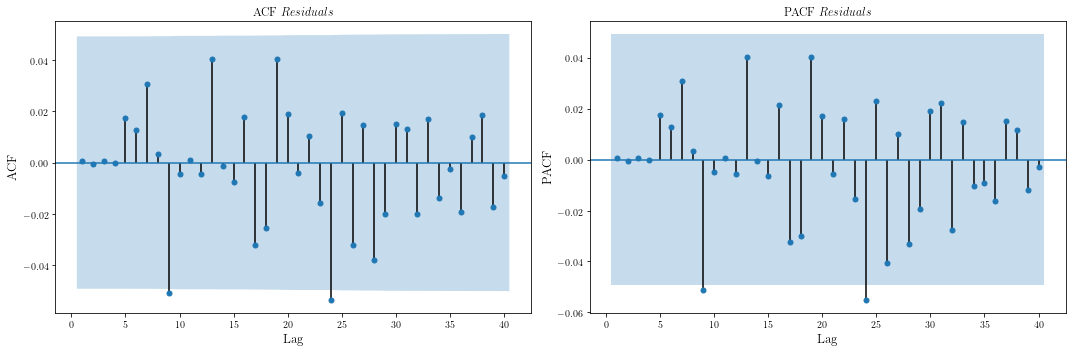

In [435]:
plot_diagnosticsTight2(res2,title1 = '$Residuals$', lags=40)

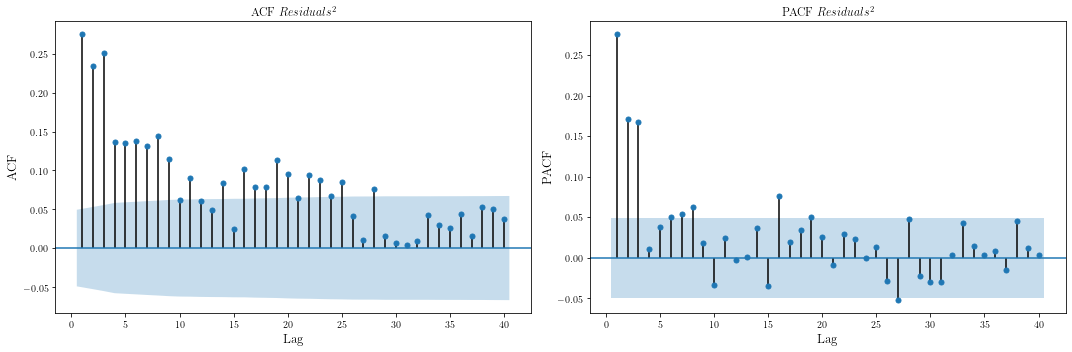

In [428]:
plot_diagnosticsTight2(res2**2, title1 = '$Residuals^2$', lags=40)

In [208]:
#Important question: do further lags disappear now? NO¡

In [450]:
searchARMA(res2, exog=np.arange(1), max_p=5, max_q = 5)

p: 0  q: 1  aic: -8709.87491179941
p: 0  q: 2  aic: -8716.951094938247
p: 0  q: 3  aic: -8722.404771776437
p: 0  q: 4  aic: -8729.988560010253
p: 0  q: 5  aic: -8729.857596920247
p: 1  q: 0  aic: -8716.818535575962
p: 1  q: 1  aic: -8781.68845450349
p: 1  q: 2  aic: -8781.811278670059
p: 1  q: 3  aic: -8779.893312845606
p: 1  q: 4  aic: -8778.054247628414
p: 2  q: 0  aic: -8726.458980163568
p: 2  q: 1  aic: -8781.862289032255
p: 2  q: 2  aic: -8767.231030369208
p: 2  q: 3  aic: -8779.07954904007
p: 2  q: 4  aic: -8777.079749379642
p: 3  q: 0  aic: -8734.247369241
p: 3  q: 1  aic: -8779.926862849798
p: 3  q: 2  aic: -8777.908100006693
p: 3  q: 3  aic: -8776.02176077138
p: 3  q: 4  aic: -8764.99848176567
p: 4  q: 0  aic: -8741.18830835368
p: 4  q: 1  aic: -8778.130287974824
p: 4  q: 2  aic: -8777.07358176144
p: 4  q: 3  aic: -8780.662532320275
p: 5  q: 0  aic: -8741.460897933928
p: 5  q: 1  aic: -8776.700218430557
p: 5  q: 2  aic: -8774.1700704612
p: 5  q: 3  aic: -8766.65701707356


In [405]:
mod=ARMA(res2,(0,0)).fit()
mod.aic

-10554.23729665457

In [452]:
newAAPLRet = FTSERetcut*100
arx = ARX(newAAPLRet, lags=0,rescale = False) #this is eq. to AR(4) as per above
arx.volatility = GARCH(1,0,0)
fin = arx.fit(update_freq=0)#, tol=0.000001
res2=fin.resid
print(fin.summary())

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 612.4949563938491
            Iterations: 9
            Function evaluations: 56
            Gradient evaluations: 9
                           AR - ARCH Model Results                            
Dep. Variable:                   FTSE   R-squared:                      -0.002
Mean Model:                        AR   Adj. R-squared:                 -0.002
Vol Model:                       ARCH   Log-Likelihood:               -612.495
Distribution:                  Normal   AIC:                           1230.99
Method:            Maximum Likelihood   BIC:                           1244.06
                                        No. Observations:                  577
Date:                Fri, Dec 13 2019   Df Residuals:                      574
Time:                        03:22:26   Df Model:                            3
                                  Mean Model                                 
   

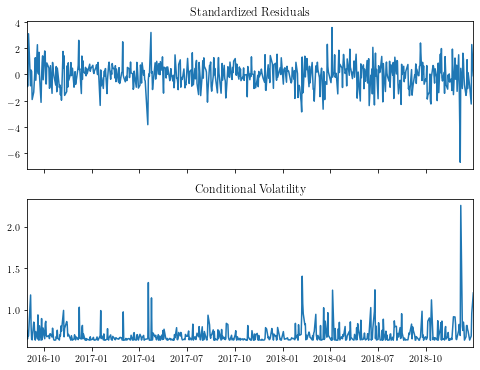

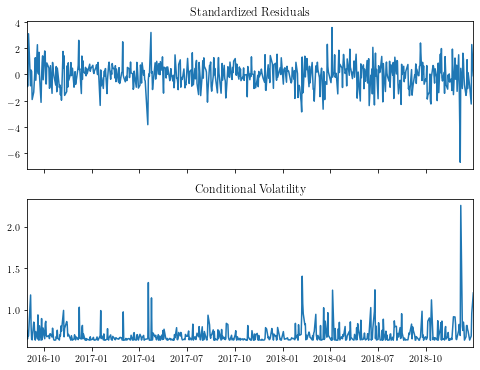

In [453]:
fin.plot()

In [454]:
std_resid = fin.resid/fin.conditional_volatility
std_resid = std_resid.dropna()

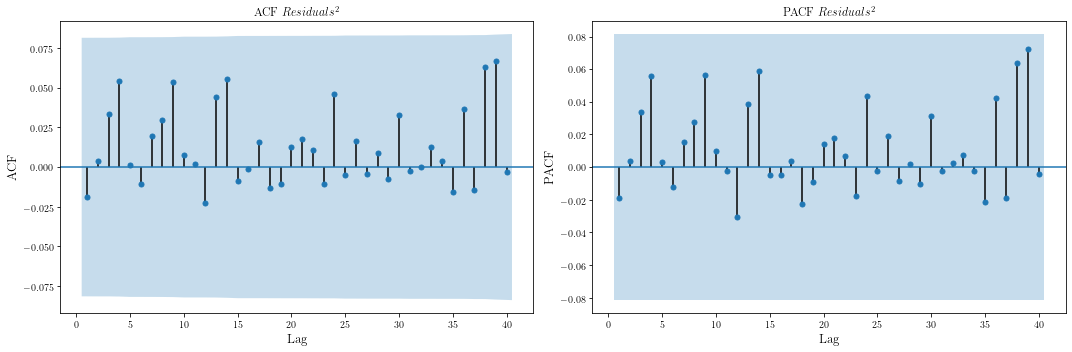

In [455]:
plot_diagnosticsTight2(std_resid**2, title1 = '$Residuals^2$', lags=40)

# HASTA AQI PRIMERA PARTE

In [150]:
#CHECK STATIONARITY. ADF AND KPSS
test = adfuller(FTSERet2)
print('ADF Statistic: %f' % test[0])
print('p-value: %f' % test[1])
print('Critical Values:i/')
for item, value in test[4].items():
    print('\t%s: %.2f' % (item, value))
    
test = kpss(FTSERet2) 
print('KPSS Statistic: %f' % test[0])
print('p-value: %f' % test[1])
print('Critical Values:')
for item, value in test[3].items():
    print('\t%s: %.2f' % (item, value))



ADF Statistic: -21.238405
p-value: 0.000000
Critical Values:i/
	1%: -3.43
	5%: -2.86
	10%: -2.57
KPSS Statistic: 0.101430
p-value: 0.100000
Critical Values:
	10%: 0.35
	5%: 0.46
	2.5%: 0.57
	1%: 0.74


In [231]:
# cortar X1 en el Brexit

In [241]:
X1.index[998]#start here monday (saturday brexit)

Timestamp('2016-08-26 00:00:00')

In [264]:
FTSERet2cut=FTSERet2[998:]
FTSERetcut=FTSERet[998:]

In [460]:
X1.head()

,const,SPY,AV,BH,BD,UKG,GBPUSD,cos,sin,expert
date,,,,,,,,,,
2012-08-16,1.0,0.007351,0.010152,0.014615,-0.004786,-0.003693,0.003502,1.000000,0.000000,5686.129754
2012-08-17,1.0,0.001337,0.006103,-0.002294,0.021025,0.004185,-0.002354,0.999965,0.008377,5902.311989
2012-08-20,1.0,0.000070,-0.011320,-0.005116,0.021249,-0.000983,0.000701,0.999860,0.016754,5916.024803
2012-08-21,1.0,-0.003029,0.027615,0.015015,0.007853,-0.006413,0.004700,0.999684,0.025130,5940.475237
2012-08-22,1.0,0.000423,-0.016904,-0.016808,-0.025084,0.004937,0.006253,0.999439,0.033504,5925.131314


In [463]:
SPY=X1['SPY'].values[-30:]
AV=X1['AV'].values[-30:]
BH=X1['BH'].values[-30:]
BD=X1['BD'].values[-30:]
UKG=X1['UKG'].values[-30:]
GBPUSD=X1['GBPUSD'].values[-30:]
index=X1.index[-30:]

In [466]:
index[-30:-25]

DatetimeIndex(['2018-11-14', '2018-11-15', '2018-11-16', '2018-11-19',
               '2018-11-20'],
              dtype='datetime64[ns]', name='date', freq=None)

In [468]:
myList = [index, SPY, AV, BH, BD, UKG, GBPUSD]
myNames = ['date', 'SPY', 'AV', 'BH', 'BD', 'UKG', 'GBPUSD']
myDict = dict(zip(myNames, myList))
X3 = pd.DataFrame({ key:pd.Series(value) for key, value in myDict.items()})
X3.set_index(X3['date'], inplace = True) #if it is not true id does not work but I do not know why
del X3['date']

In [486]:
SPY=X1['SPY'].values[998:]
AV=X1['AV'].values[998:]
BH=X1['BH'].values[998:]
BD=X1['BD'].values[998:]
UKG=X1['UKG'].values[998:]
GBPUSD=X1['GBPUSD'].values[998:]
index=X1.index[998:]

In [693]:
index[0]

Timestamp('2016-08-30 00:00:00')

In [488]:
#RUN PREVIOUS
SPY=SPY[:-30]
AV=AV[:-30]
BH=BH[:-30]
BD=BD[:-30]
UKG=UKG[:-30]
GBPUSD=GBPUSD[:-30]
index=index[:-30]


myList = [index, SPY, AV, BH, BD, UKG, GBPUSD]
myNames = ['date', 'SPY', 'AV', 'BH', 'BD', 'UKG', 'GBPUSD']
myDict = dict(zip(myNames, myList))
X4 = pd.DataFrame({ key:pd.Series(value) for key, value in myDict.items()})
X4.set_index(X4['date'], inplace = True) #if it is not true id does not work but I do not know why
del X4['date']

In [275]:
len(FTSERet)

1575

In [261]:
myList = [index, SPY, AV, BH, BD, UKG, GBPUSD]
myNames = ['date', 'SPY', 'AV', 'BH', 'BD', 'UKG', 'GBPUSD']
myDict = dict(zip(myNames, myList))
X2 = pd.DataFrame({ key:pd.Series(value) for key, value in myDict.items()})
X2.set_index(X2['date'], inplace = True) #if it is not true id does not work but I do not know why
del X2['date']

In [510]:
print(X2.head())
FTSERetcut.head()

                 SPY        AV        BH        BD       UKG    GBPUSD
date                                                                  
2016-08-30  0.003262  0.013757 -0.037260 -0.014531  0.000712 -0.004196
2016-08-31 -0.002848  0.009145 -0.049853  0.004260 -0.003564  0.004805
2016-09-01  0.000046  0.002564 -0.004338  0.012073 -0.001327  0.009540
2016-09-02  0.004498  0.014791  0.020705  0.005982 -0.007484  0.001431
2016-09-06  0.003021 -0.002757  0.001606  0.007921  0.004415  0.010108


date
2016-08-30   -0.002533
2016-08-31   -0.005778
2016-09-01   -0.005249
2016-09-02    0.021789
2016-09-06   -0.009985
Name: FTSE, dtype: float64

In [699]:
split_date=FTSERet.index[-30]
split_date

Timestamp('2018-11-14 00:00:00')

In [746]:
exp=np.log(expert_align_clean).diff().dropna()

In [827]:
len(exp)

1605

In [835]:
SPY=X1['SPY'].values[998:]
AV=X1['AV'].values[998:]
BH=X1['BH'].values[998:]
BD=X1['BD'].values[998:]
UKG=X1['UKG'].values[998:]
GBPUSD=X1['GBPUSD'].values[998:]
index=X1.index[998:]

In [ ]:
index=expert.index[998:]

In [832]:
SPY=np.concatenate((SPY,SPY[-30:]))
AV=np.concatenate((AV,AV[-30:]))
BH=np.concatenate((BH,BH[-30:]))
BD=np.concatenate((BD,BD[-30:]))
UKG=np.concatenate((UKG,UKG[-30:]))
GBPUSD=np.concatenate((GBPUSD,GBPUSD[-30:]))

In [787]:
X2['exp']=exp

In [751]:
exp2=exp[998:-30]

In [752]:
len(exp2)

577

In [738]:
FTSERetcut.head()

date
2016-08-30   -0.002533
2016-08-31   -0.005778
2016-09-01   -0.005249
2016-09-02    0.021789
2016-09-06   -0.009985
Name: FTSE, dtype: float64

In [816]:
exp2 = sm.add_constant(exp[998:-30])
lm_10 = sm.OLS(FTSERetcut, X2).fit()
print(lm_10.summary())

                                 OLS Regression Results                                
Dep. Variable:                   FTSE   R-squared (uncentered):                   0.939
Model:                            OLS   Adj. R-squared (uncentered):              0.938
Method:                 Least Squares   F-statistic:                              1243.
Date:                Fri, 13 Dec 2019   Prob (F-statistic):                        0.00
Time:                        06:58:44   Log-Likelihood:                          2840.4
No. Observations:                 577   AIC:                                     -5667.
Df Residuals:                     570   BIC:                                     -5636.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [1251]:
X2.tail()

,SPY,AV,BH,BD,UKG,GBPUSD,exp
date,,,,,,,
2018-12-21,-0.026525,0.005122,0.015760,0.014260,-0.004956,-0.001977,-0.001200
2018-12-24,-0.026778,0.000806,-0.007666,-0.016282,0.007865,0.005606,-0.003517
2018-12-27,0.056938,-0.020630,-0.016006,0.002919,-0.008859,-0.004656,-0.014693
2018-12-28,-0.001291,0.032383,0.015762,0.028949,0.004468,0.004420,0.021856
2018-12-31,0.008721,-0.002925,0.008879,0.008027,-0.001762,0.004087,0.001513


In [1073]:
FTSE.tail()

date
2018-12-21    6721.2002
2018-12-24    6686.0000
2018-12-27    6584.7002
2018-12-28    6734.0000
2018-12-31    6728.1001
Name: FTSE, dtype: float64

In [1074]:
FTSERetcut.tail()

date
2018-12-21    0.001385
2018-12-24   -0.005251
2018-12-27   -0.015267
2018-12-28    0.022421
2018-12-31   -0.000877
Name: FTSE, dtype: float64

In [1266]:
split_date=FTSERetcut.index[-30]
lastprice=FTSE[-30]

In [1267]:
print(split_date)
print(FTSE.index[-30])

2018-11-14 00:00:00
2018-11-14 00:00:00


In [1268]:
newAAPLRet = FTSERetcut*100
arx = ARX(newAAPLRet, x=X2, lags=1,rescale = False) #this is eq. to AR(4) as per above
arx.volatility = GARCH(1,0,0)
res2 = arx.fit(update_freq=0, last_obs = split_date)
print(res2.summary())

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -189.02601004046218
            Iterations: 15
            Function evaluations: 213
            Gradient evaluations: 15
                          AR-X - ARCH Model Results                           
Dep. Variable:                   FTSE   R-squared:                       0.932
Mean Model:                      AR-X   Adj. R-squared:                  0.931
Vol Model:                       ARCH   Log-Likelihood:                189.026
Distribution:                  Normal   AIC:                          -356.052
Method:            Maximum Likelihood   BIC:                          -308.723
                                        No. Observations:                  546
Date:                Fri, Dec 13 2019   Df Residuals:                      535
Time:                        10:00:09   Df Model:                           11
                                  Mean Model                                

In [1274]:
numH = 50
forecasts2 = res2.forecast(horizon=numH, method='simulation',simulations = 1000) #default number of simulations is 1000
sims = forecasts2.simulations

In [1275]:
sims.values.shape

(577, 1000, 50)

In [1276]:
def getPathsExp(forecastSims, lastPrice):
    numSim = forecastSims.shape[0]
    numH = forecastSims.shape[1]
    print(numSim)
    print(numH)
    totValueAcrossPath = np.zeros(numSim)
    spotData = np.zeros((numSim,numH+1))
    for j in range(numSim): #for each path    
        spotData[j,0]=lastPrice
        
    for j in range(numSim): #for each path    
        for i in range(numH):
            spotData[j][i+1] = np.exp(forecastSims[j][i]/100)*spotData[j][i]

    return spotData

In [1278]:
totReturnPaths = getPathsExp(sims.values[-1,:,:],lastprice)
final=totReturnPaths[:,-1]

1000
50


In [1284]:
sims.values[-32,:,:]

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

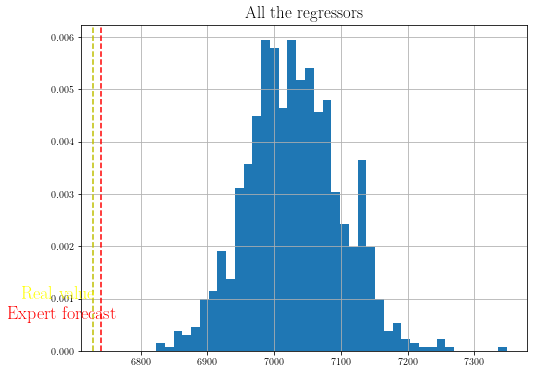

In [1273]:
plt.hist(final, bins = 40, density='True')

#plt.text(FTSE.index[1030],6000,r'2016-08-27 \\ (2 months after Brexit)',fontsize=15,color='red')
plt.axvline(6740.243561,color='r',linestyle='--')
plt.axvline(6728.1001,color='y',linestyle='--')
plt.text(6620,0.0010,r'Real value',fontsize=18,color='yellow')
plt.text(6600,0.0006,r'Expert forecast',fontsize=18,color='red')
plt.title('All the regressors', fontsize=17)

plt.grid()
plt.savefig("diego.jpg", bbox_inches='tight')
plt.show()

In [1130]:
FTSE[-1]

6728.1001

In [1082]:
#y en febrero?

In [1083]:
SPY=X1['SPY'].values[998:]
AV=X1['AV'].values[998:]
BH=X1['BH'].values[998:]
BD=X1['BD'].values[998:]
UKG=X1['UKG'].values[998:]
GBPUSD=X1['GBPUSD'].values[998:]
index=X1.index[998:]
print(len(index))
print(len(BH))

577
577


In [1084]:
index=exp.index[998:]
SPY=pd.Series(np.append(SPY,SPY[-30:]))
AV=np.concatenate((AV,AV[-30:]))
BH=np.concatenate((BH,BH[-30:]))
BD=np.concatenate((BD,BD[-30:]))
UKG=np.concatenate((UKG,UKG[-30:]))
GBPUSD=np.concatenate((GBPUSD,GBPUSD[-30:]))

In [1085]:
len(SPY)

607

In [1086]:
len(index)

607

In [1366]:
split_date=FTSE.index[-1]
lastprice=FTSE[-1]
split_date

Timestamp('2018-12-31 00:00:00')

In [1370]:
lastprice=FTSE[-1]

In [1369]:
FTSE[-2:]

date
2018-12-28    6734.0000
2018-12-31    6728.1001
Name: FTSE, dtype: float64

In [1342]:
split_date

Timestamp('2018-12-31 00:00:00')

In [1344]:
myList = [index, SPY, AV, BH, BD, UKG, GBPUSD, exp.values[998:]]
myNames = ['date', 'SPY', 'AV', 'BH', 'BD', 'UKG', 'GBPUSD','exp']
myDict = dict(zip(myNames, myList))
X4 = pd.DataFrame({ key:pd.Series(value) for key, value in myDict.items()})
X4.set_index(X4['date'], inplace = True) #if it is not true id does not work but I do not know why
del X4['date']

In [1346]:
X4.tail()

,SPY,AV,BH,BD,UKG,GBPUSD,exp
date,,,,,,,
2019-02-06,-0.026525,0.005122,0.015760,0.014260,-0.004956,-0.001977,-0.011184
2019-02-07,-0.026778,0.000806,-0.007666,-0.016282,0.007865,0.005606,-0.004430
2019-02-08,0.056938,-0.020630,-0.016006,0.002919,-0.008859,-0.004656,0.007707
2019-02-11,-0.001291,0.032383,0.015762,0.028949,0.004468,0.004420,0.002546
2019-02-12,0.008721,-0.002925,0.008879,0.008027,-0.001762,0.004087,0.008562


In [1371]:
FT=FTSERetcut.values
FT=np.concatenate((FT,np.arange(30)))
print(type(FT))
myList = [index, FT]
myNames = ['date', 'FTSERet']
myDict = dict(zip(myNames, myList))
FTSERetcutext = pd.DataFrame({ key:pd.Series(value) for key, value in myDict.items()})
FTSERetcutext.set_index(FTSERetcutext['date'], inplace = True) #if it is not true id does not work but I do not know why
del FTSERetcutext['date']

<class 'numpy.ndarray'>


In [1421]:
x=X4[['SPY', 'AV', 'BH', 'BD', 'UKG', 'GBPUSD']]

In [1403]:
split_date=FTSE.index[-1]
lastprice=FTSE[-1]
split_date

Timestamp('2018-12-31 00:00:00')

In [1442]:
newAAPLRet = FTSERetcutext*100
arx = ARX(newAAPLRet, x=X4[['exp']], lags=1,rescale = False) #this is eq. to AR(4) as per above
arx.volatility = GARCH(1,0,0)
res2 = arx.fit(update_freq=0, last_obs=split_date)
print(res2.summary())

numH = 30
forecasts2 = res2.forecast(horizon=numH, method='simulation',simulations = 1000) #default number of simulations is 1000
sims = forecasts2.simulations
totReturnPaths = getPathsExp(sims.values[-30,:,:],lastprice)
final=totReturnPaths[:,-1]

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -168.8565319095738
            Iterations: 11
            Function evaluations: 94
            Gradient evaluations: 11
                          AR-X - ARCH Model Results                           
Dep. Variable:                FTSERet   R-squared:                       0.933
Mean Model:                      AR-X   Adj. R-squared:                  0.933
Vol Model:                       ARCH   Log-Likelihood:                168.857
Distribution:                  Normal   AIC:                          -327.713
Method:            Maximum Likelihood   BIC:                          -305.941
                                        No. Observations:                  575
Date:                Fri, Dec 13 2019   Df Residuals:                      570
Time:                        12:35:43   Df Model:                            5
                                  Mean Model                                  

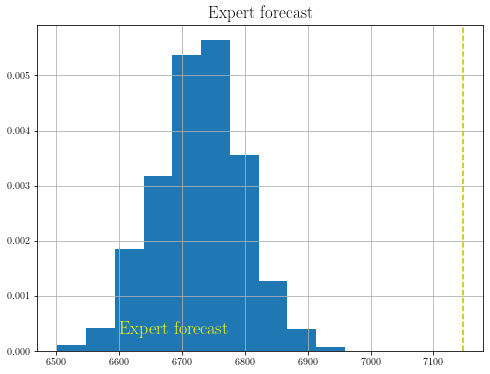

In [1445]:
plt.hist(final, bins = 10,density='True')

#plt.text(FTSE.index[1030],6000,r'2016-08-27 \\ (2 months after Brexit)',fontsize=15,color='red')
#plt.axvline(6740.243561,color='r',linestyle='--')
#plt.axvline(6728.1001,color='y',linestyle='--')
#plt.text(6600,0.0006,r'Expert forecast',fontsize=18,color='red')
plt.title('Expert forecast', fontsize=17)
plt.axvline(7147.095940,color='y',linestyle='--')
plt.text(6600,0.0003,r'Expert forecast',fontsize=18,color='yellow')
#statistics


plt.grid()
plt.savefig("hist26.jpg", bbox_inches='tight')
plt.show()

In [1444]:
print(np.median(final))
print(np.mean(final))
print(np.std(final))
print(np.sum(final>lastprice)/1000)

6730.396923606171
6728.232175328052
69.09946337989953
0.508


In [1382]:
expert[-2:]

date
2019-02-11    7098.891179
2019-02-12    7147.095940
dtype: float64

In [ ]:
print(np.quantile(h5_values,0.025))
print(np.quantile(h5_values,0.975))
print(np.quantile(h5_values,0.025))
print(np.quantile(h5_values,0.975))
plt.hist(h5_values,bins = 40, color = 'm')
plt.grid()
plt.show()